## task 1: data loading

In [1]:
################# Data description and pre-processing #################
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import seaborn as sns
import sklearn
import statsmodels
import statsmodels.api as sm
from matplotlib import rcParams
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample

from matplotlib.ticker import MaxNLocator
# Style settings
rcParams["font.family"] = "serif"
plt.style.use("fast")

In [2]:
########################### Chi-Square test #########################
from scipy.stats import chi2_contingency

In [3]:
################# Multiple Logistic Regression #####################
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.datasets import make_classification
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [4]:
############################ loading data ############################
df = pd.read_csv("ttransporte.csv")
data = pd.read_csv("tviaje.csv")

## task 2: Data prepossing(use 'df')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890748 entries, 0 to 890747
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id_tra     890748 non-null  int64  
 1   id_via     890748 non-null  int64  
 2   p5_3       890748 non-null  int64  
 3   n_via      890748 non-null  int64  
 4   p5_14      890748 non-null  int64  
 5   p5_16      890748 non-null  int64  
 6   p5_16_1_1  890748 non-null  int64  
 7   p5_16_1_2  890748 non-null  int64  
 8   p5_16_2    274526 non-null  float64
 9   p5_17_1c   87931 non-null   float64
 10  p5_17_2c   87931 non-null   float64
 11  estrato    890748 non-null  int64  
 12  factor     890748 non-null  int64  
 13  upm_dis    890748 non-null  int64  
 14  est_dis    890748 non-null  int64  
 15  tloc       890748 non-null  int64  
 16  sexo       890748 non-null  int64  
 17  edad       890748 non-null  int64  
dtypes: float64(3), int64(15)
memory usage: 122.3 MB


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531594 entries, 0 to 531593
Data columns (total 82 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_via      531594 non-null  int64  
 1   id_soc      531594 non-null  int64  
 2   p5_3        531594 non-null  int64  
 3   n_via       531594 non-null  int64  
 4   p5_6        531594 non-null  int64  
 5   p5_7_6      531594 non-null  int64  
 6   p5_7_7      531594 non-null  int64  
 7   dto_origen  531594 non-null  int64  
 8   p5_9_1      531594 non-null  int64  
 9   p5_9_2      531594 non-null  int64  
 10  p5_10_1     531594 non-null  int64  
 11  p5_10_2     531594 non-null  int64  
 12  p5_11a      531594 non-null  int64  
 13  p5_12_6     531594 non-null  int64  
 14  p5_12_7     531594 non-null  int64  
 15  dto_dest    531594 non-null  int64  
 16  p5_13       531594 non-null  int64  
 17  p5_14_01    531594 non-null  int64  
 18  p5_15_01    112248 non-null  float64
 19  p5

### task 3: merging ###

In [7]:
# left join #
result = pd.merge(data, df, on="id_via", how="left")
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890748 entries, 0 to 890747
Data columns (total 99 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_via      890748 non-null  int64  
 1   id_soc      890748 non-null  int64  
 2   p5_3_x      890748 non-null  int64  
 3   n_via_x     890748 non-null  int64  
 4   p5_6        890748 non-null  int64  
 5   p5_7_6      890748 non-null  int64  
 6   p5_7_7      890748 non-null  int64  
 7   dto_origen  890748 non-null  int64  
 8   p5_9_1      890748 non-null  int64  
 9   p5_9_2      890748 non-null  int64  
 10  p5_10_1     890748 non-null  int64  
 11  p5_10_2     890748 non-null  int64  
 12  p5_11a      890748 non-null  int64  
 13  p5_12_6     890748 non-null  int64  
 14  p5_12_7     890748 non-null  int64  
 15  dto_dest    890748 non-null  int64  
 16  p5_13       890748 non-null  int64  
 17  p5_14_01    890748 non-null  int64  
 18  p5_15_01    120388 non-null  float64
 19  p5

In [8]:
use_col = [
    "p5_6",
    "p5_9_1",
    "p5_10_1",
    "p5_11a",
    "p5_13",
    "p5_14",
    "dto_origen",
    "dto_dest",
    "p5_16_1_1",
    "estrato_x",
    "tloc_x",
    "sexo_x",
    "edad_x"
]

In [9]:
test = result.loc[:, use_col]

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890748 entries, 0 to 890747
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   p5_6        890748 non-null  int64
 1   p5_9_1      890748 non-null  int64
 2   p5_10_1     890748 non-null  int64
 3   p5_11a      890748 non-null  int64
 4   p5_13       890748 non-null  int64
 5   p5_14       890748 non-null  int64
 6   dto_origen  890748 non-null  int64
 7   dto_dest    890748 non-null  int64
 8   p5_16_1_1   890748 non-null  int64
 9   estrato_x   890748 non-null  int64
 10  tloc_x      890748 non-null  int64
 11  sexo_x      890748 non-null  int64
 12  edad_x      890748 non-null  int64
dtypes: int64(13)
memory usage: 88.3 MB


### task 4: datatype exchange ###

In [11]:
numeric_cols = test.select_dtypes(include=['int64', 'float64']).columns  
df_numeric_desc = test[numeric_cols].describe()  
print("Numeric columns description:")  
print(df_numeric_desc) 

Numeric columns description:
                p5_6         p5_9_1        p5_10_1         p5_11a  \
count  890748.000000  890748.000000  890748.000000  890748.000000   
mean        2.987321      12.574397      13.367786       3.309677   
std         3.360065       5.625255       5.636125       5.319710   
min         1.000000       0.000000       0.000000       1.000000   
25%         1.000000       8.000000       9.000000       1.000000   
50%         2.000000      13.000000      13.000000       2.000000   
75%         5.000000      17.000000      17.000000       5.000000   
max        99.000000      99.000000      99.000000      99.000000   

               p5_13          p5_14     dto_origen       dto_dest  \
count  890748.000000  890748.000000  890748.000000  890748.000000   
mean        2.390234       8.069506     133.986443     139.860257   
std         3.600036       5.782464     198.906352     211.367599   
min         1.000000       1.000000       1.000000       1.000000   
25% 

In [12]:
test.isnull().sum()

p5_6          0
p5_9_1        0
p5_10_1       0
p5_11a        0
p5_13         0
p5_14         0
dto_origen    0
dto_dest      0
p5_16_1_1     0
estrato_x     0
tloc_x        0
sexo_x        0
edad_x        0
dtype: int64

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890748 entries, 0 to 890747
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   p5_6        890748 non-null  int64
 1   p5_9_1      890748 non-null  int64
 2   p5_10_1     890748 non-null  int64
 3   p5_11a      890748 non-null  int64
 4   p5_13       890748 non-null  int64
 5   p5_14       890748 non-null  int64
 6   dto_origen  890748 non-null  int64
 7   dto_dest    890748 non-null  int64
 8   p5_16_1_1   890748 non-null  int64
 9   estrato_x   890748 non-null  int64
 10  tloc_x      890748 non-null  int64
 11  sexo_x      890748 non-null  int64
 12  edad_x      890748 non-null  int64
dtypes: int64(13)
memory usage: 88.3 MB


In [14]:
cols_to_convert = [
    "p5_9_1",
    "p5_10_1"
]

test[cols_to_convert] = test[cols_to_convert].apply(lambda col: col.astype('category'))  

### task 5: Explainable Data Analysis ###

In [21]:
def plot_bar_chart(df, column_name, width=14, height=8):  
    # 检查列名是否正确  
    if column_name not in df.columns:  
        print(f"列名 '{column_name}' 不存在于DataFrame中。")  
        return  
  
    # 检查列中是否有数据  
    if df[column_name].empty:  
        print(f"列 '{column_name}' 是空的，无法绘制条形图。")  
        return  
  
    # 计算类别计数并排序  
    category_counts = df[column_name].value_counts().sort_values(ascending=True)  
  
    # 绘制横向条形图并设置图片大小  
    plt.figure(figsize=(width, height))  # 设置宽度和高度  
    category_counts.plot(kind='barh',  
                         title=f'{column_name} Distribution and Counts',  
                          colors=plt.cm.Paired.colors,  
                         legend=False)  
  
    # 设置x轴和y轴的标签  
    plt.xlabel('Count (population)')  # x轴标签：数量（加上单位人数）  
  
    # 确保图例和标签不会重叠  
    plt.tight_layout()  
  
    # 显示图形  
    plt.show()  

In [16]:
def plot_pie_chart(df, column_name, width=14, height=8):
    # 检查列名是否正确
    if column_name not in df.columns:
        print(f"列名 '{column_name}' 不存在于 DataFrame 中。")
        return

    # 检查列中是否有数据
    if df[column_name].empty:
        print(f"列 '{column_name}' 是空的，无法绘制饼图。")
        return

    # 计算类别计数
    category_counts = df[column_name].value_counts()

    # 绘制饼图并设置图片大小
    plt.figure(figsize=(width, height))
    category_counts.plot(
        kind='pie', 
        autopct='%1.1f%%',  # 显示百分比
        startangle=90,  # 起始角度
        colors=plt.cm.Paired.colors,  # 使用颜色映射
        wedgeprops={'edgecolor': 'black'}  # 设置边缘颜色
    )

    # 设置标题和标签
    plt.title(f'{column_name} Distribution')
    plt.ylabel('')  # 清空默认的y轴标签

    # 确保图例和标签不会重叠
    plt.tight_layout()

    # 显示图形
    plt.show()

p5_6 (Starting Point) 

In [17]:
p5_6 = {
   1: "Your Home",  
    2: "School",  
    3: "Office",  
    4: "Factory or Workshop",  
    5: "Shop, Market, Store, or Shopping Mall",  
    6: "Cultural Center or Leisure Area",  
    7: "Other Enclosures",  
    8: "Hospital, Clinic, Doctor's Office, Clinical Laboratory",  
    9: "Restaurant, Bar, Cafe",  
    10: "Sports, Gym",  
    11: "Public Transportation Hub or Station",  
    12: "Construction Site",  
    13: "Other Services",  
    14: "Religious Area",  
    15: "Thoroughfare",  
    16: "Others" 
}

test["p5_6"] = test["p5_6"].map(p5_6)

In [18]:
test = test.rename(columns={'p5_6': 'start_point'})

AttributeError: Rectangle.set() got an unexpected keyword argument 'colors'

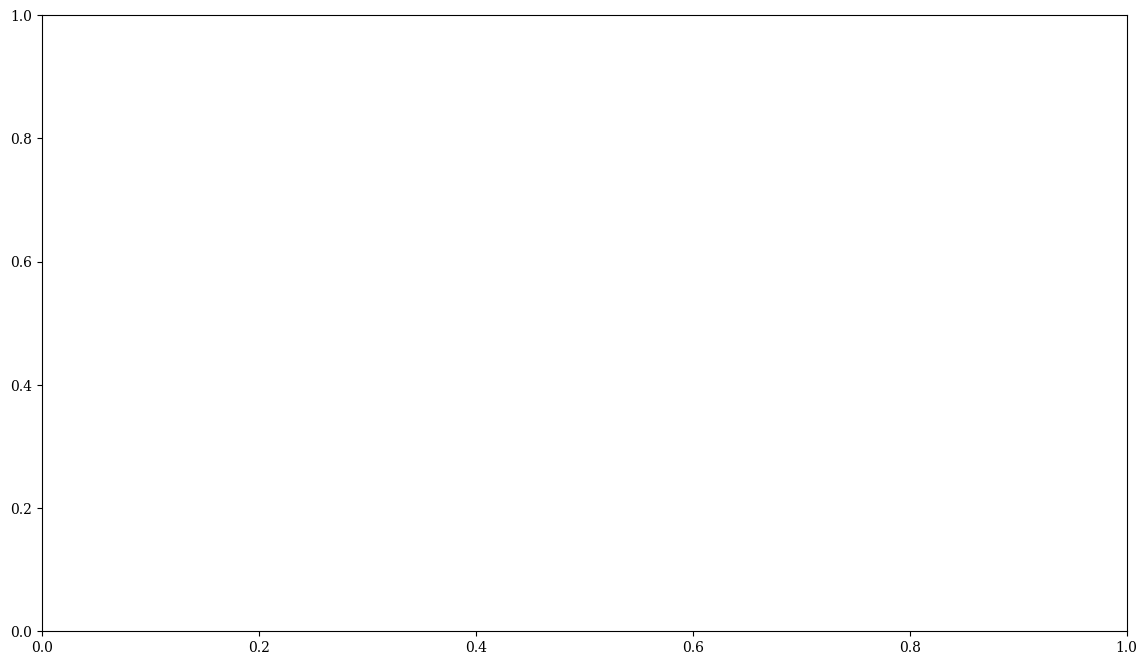

In [22]:
plot_bar_chart(test, 'start_point')

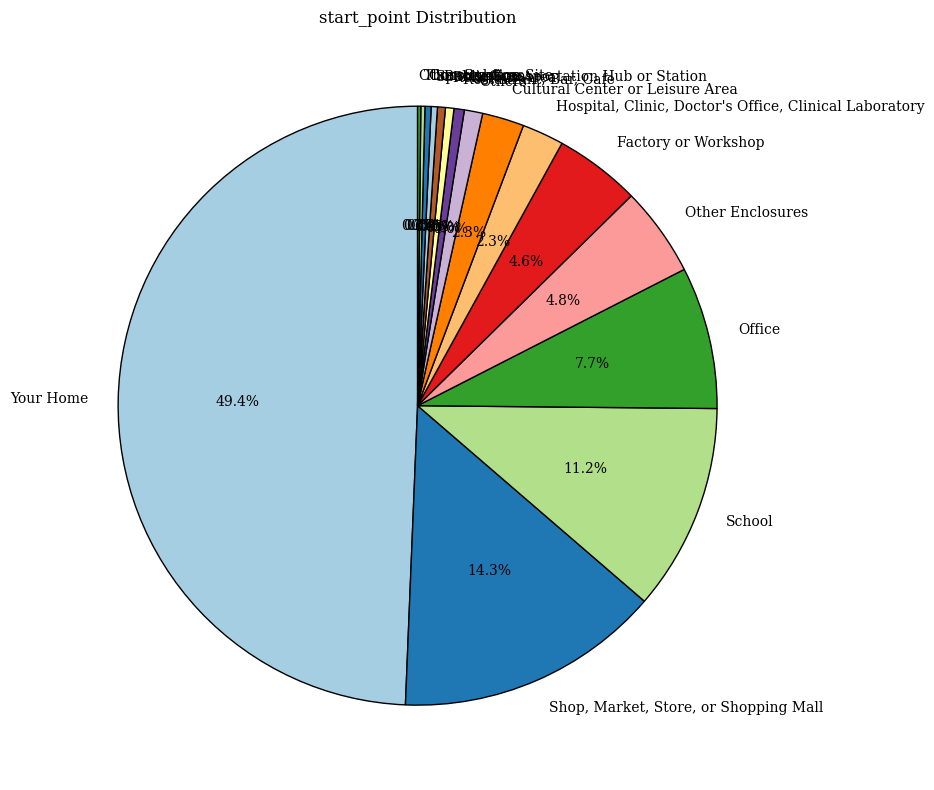

In [20]:
plot_pie_chart(test, 'start_point')

P5_9_1(When to start?)

In [19]:
### 99 means he doesn't know, so we drop them ###
test = test[test['p5_9_1'] != 99]  

In [20]:
### divide time into time range ###
def map_hour_to_period(hour):  
    if 0 <= hour < 6:  
        return 'Midnight'  
    elif 6 <= hour < 12:  
        return 'Morning'  
    elif 12 <= hour < 14:  
        return 'Noon'  
    elif 14 <= hour < 18:  
        return 'Afternoon'  
    elif 18 <= hour < 20:  
        return 'Evening'  
    else:  
        return 'Night'  

test['start_time'] = test['p5_9_1'].apply(map_hour_to_period) 

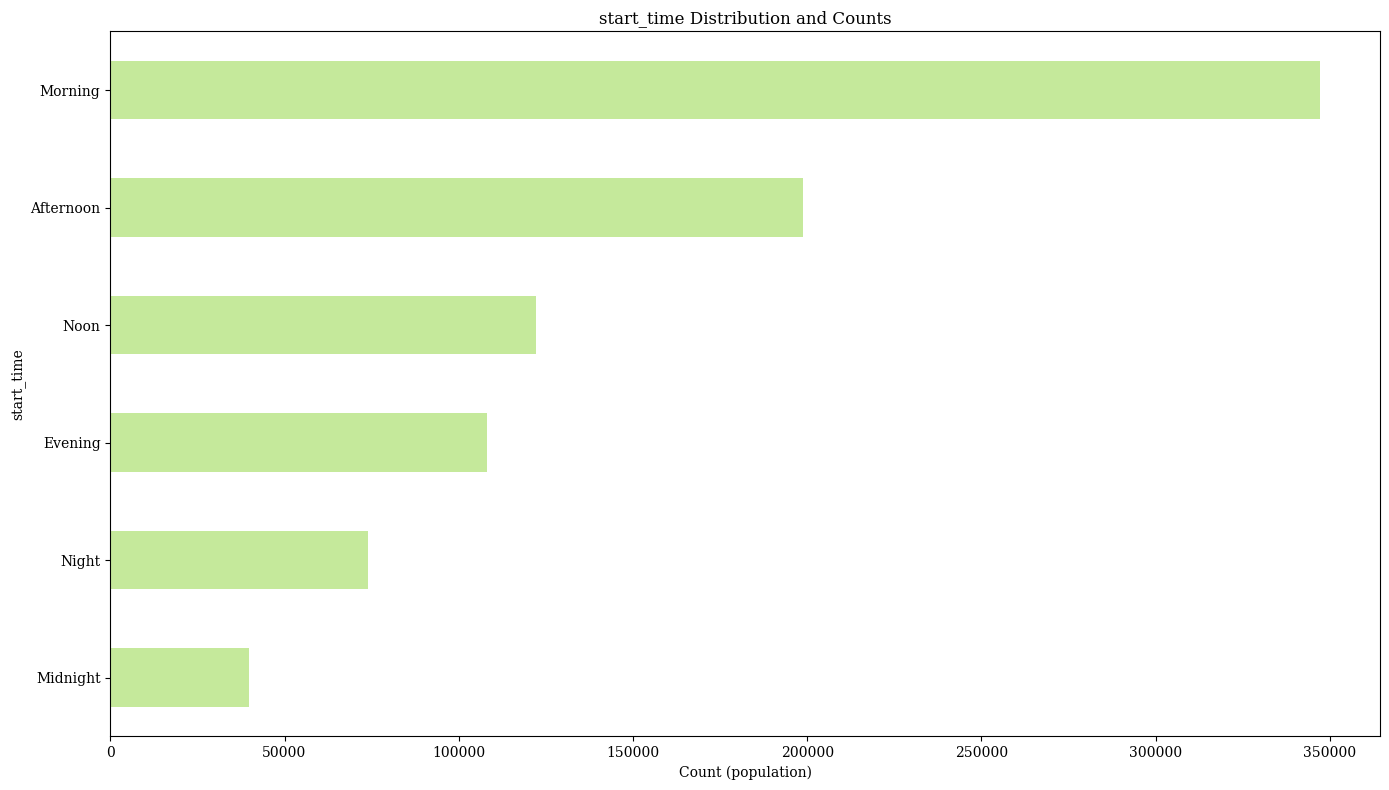

In [21]:
plot_bar_chart(test, 'start_time')

p5_10_1(when to end?)

In [22]:
### 99 means he doesn't know, so we drop them ###
test = test[test['p5_10_1'] != 99] 

In [23]:
### divide time into time range ###
def map_hour_to_period(hour):  
    if 0 <= hour < 6:  
        return 'Midnight'  
    elif 6 <= hour < 12:  
        return 'Morning'  
    elif 12 <= hour < 14:  
        return 'Noon'  
    elif 14 <= hour < 18:  
        return 'Afternoon'  
    elif 18 <= hour < 20:  
        return 'Evening'  
    else:  
        return 'Night'  

test['end_time'] = test['p5_10_1'].apply(map_hour_to_period) 

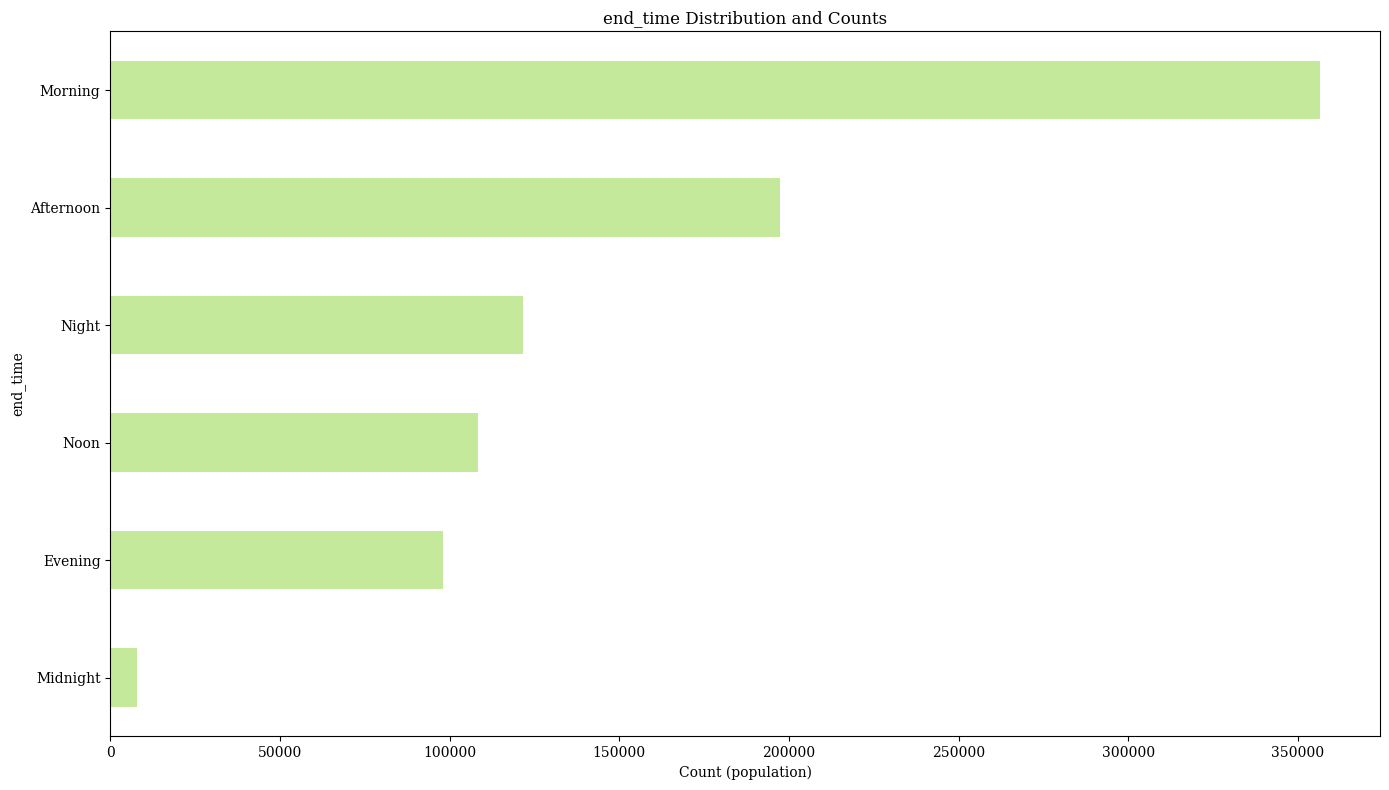

In [24]:
plot_bar_chart(test, 'end_time')

In [25]:
test['travel_time'] = test.apply(lambda row: (row['p5_10_1'] - row['p5_9_1']) % 24, axis=1)  

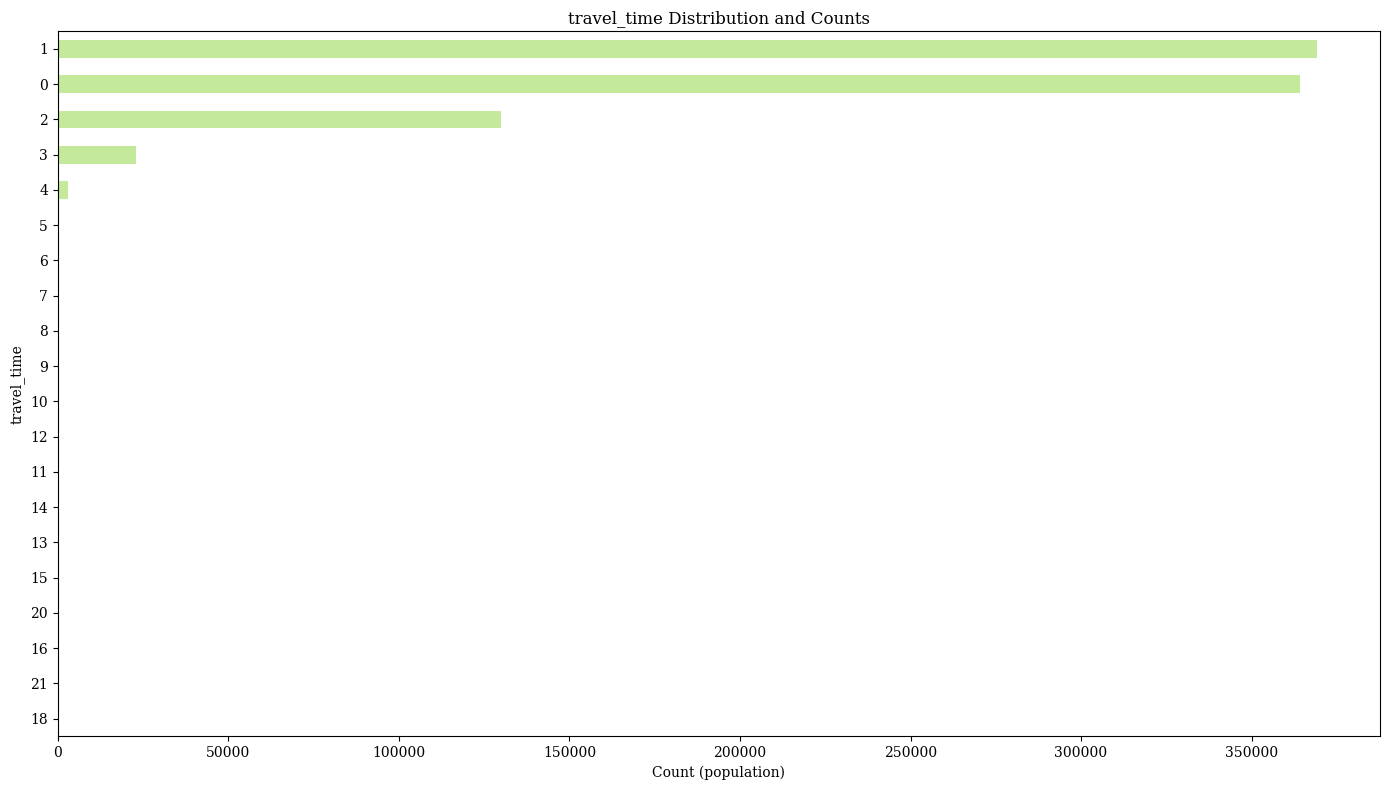

In [26]:
plot_bar_chart(test, 'travel_time')

p5_11a (Ending Point)

In [27]:
p5_11a = {
   1: "Your Home",  
    2: "School",  
    3: "Office",  
    4: "Factory or Workshop",  
    5: "Shop, Market, Store, or Shopping Mall",  
    6: "Cultural Center or Leisure Area",  
    7: "Other Enclosures",  
    8: "Hospital, Clinic, Doctor's Office, Clinical Laboratory",  
    9: "Restaurant, Bar, Cafe",  
    10: "Sports, Gym",  
    11: "Public Transportation Hub or Station",  
    12: "Construction Site",  
    13: "Other Services",  
    14: "Religious Area",  
    15: "Thoroughfare",  
    16: "Others"
}  

test["p5_11a"] = test["p5_11a"].map(p5_11a)

In [28]:
test = test.rename(columns={'p5_11a': 'end_point'})

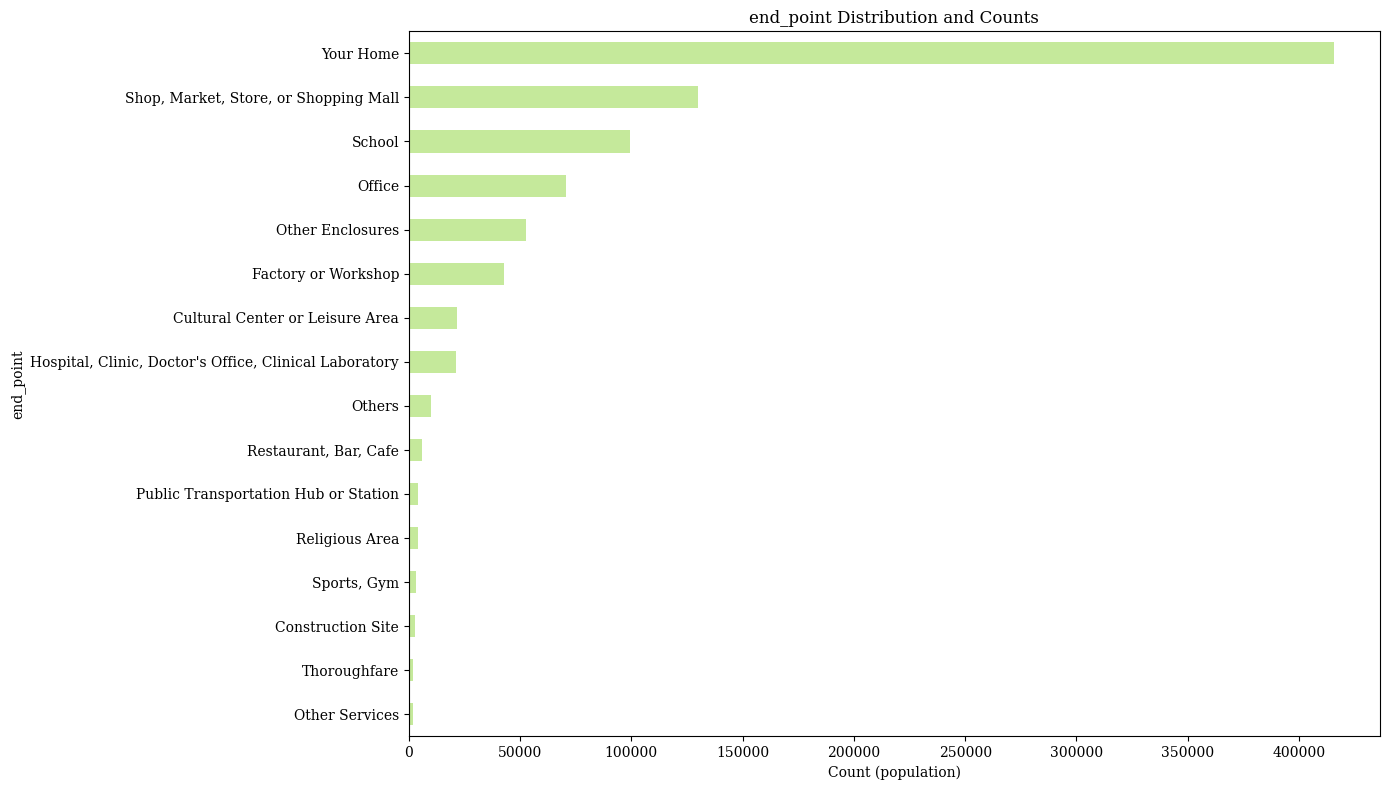

In [29]:
plot_bar_chart(test, 'end_point')

p5_13 (travel purpose)

In [30]:
p5_13 = {
    1: "Go home",
    2: "Go to work",
    3: "Go to study",
    4: "Go Shopping",
    5: "Having fun with friends or family",
    6: "Pick up people",
    7: "Execution of the program",
    8: "To receive medical care",
}

test["p5_13"] = test["p5_13"].map(p5_13)

In [31]:
test = test.rename(columns={'p5_13': 'travel_purpose'})

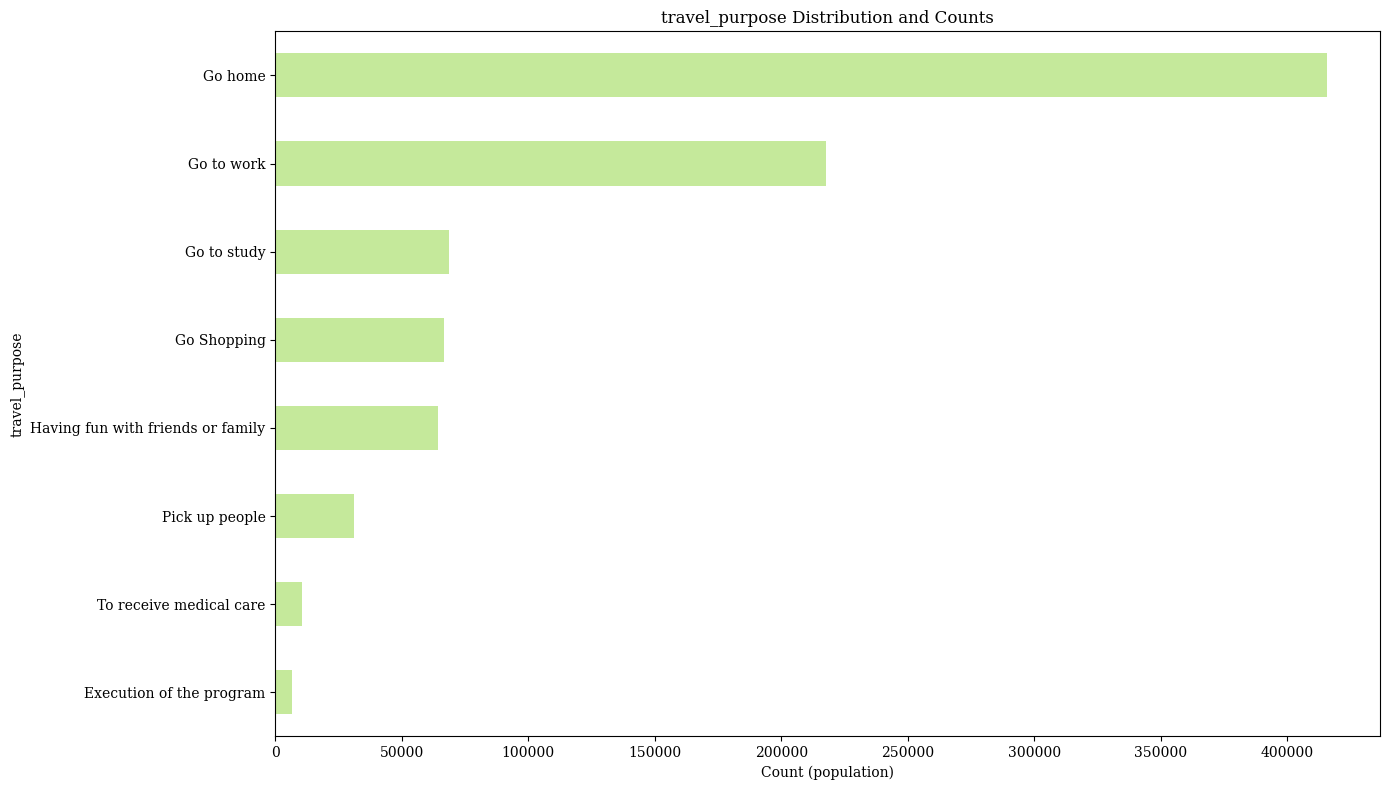

In [32]:
plot_bar_chart(test, 'travel_purpose')

p5_14(transportation)

In [33]:
p5_14 = {
    1: 'Private',    # 私人交通工具 (Automóvil)
    9: 'cycles',  # 自行车与摩托车 (Moto)
    3: 'Taxi',             # 出租车服务 (Taxi - App-based)
    4: 'Taxi',             # 出租车服务 (Taxi - Street)
    16: 'Taxi',            # 出租车服务 (Bicycle Taxi)
    17: 'Taxi',            # 出租车服务 (Motorcycle Taxi)
    7: 'cycles',  # 自行车与摩托车 (Bicicleta)
    14: 'Walking',                  # 步行
    2: 'Bus',  # 公共交通-巴士类 (Shared Bus/Minibus)
    5: 'Rail', # 公共交通-轨道类 (Metro)
    6: 'Bus',  # 公共交通-巴士类 (City Bus)
    8: 'Bus',  # 公共交通-巴士类 (Bus)
    10: 'Bus', # 公共交通-巴士类 (Trolleybus)
    11: 'Bus',# 公共交通-巴士类 (Bus Rapid Transit)
    12: 'Rail',# 公共交通-轨道类 (Light Rail)
    13: 'Rail',# 公共交通-轨道类 (Suburban Train)
    15: 'Rail',# 公共交通-轨道类 (Cable Car)
    18: 'Bus', # 公共交通-巴士类 (School Bus)
    19: 'Bus', # 公共交通-巴士类 (Employee Transportation)
    20: 'Others'
}

test["p5_14"] = test["p5_14"].map(p5_14)

In [34]:
test = test.rename(columns={'p5_14': 'transportation_mode'})

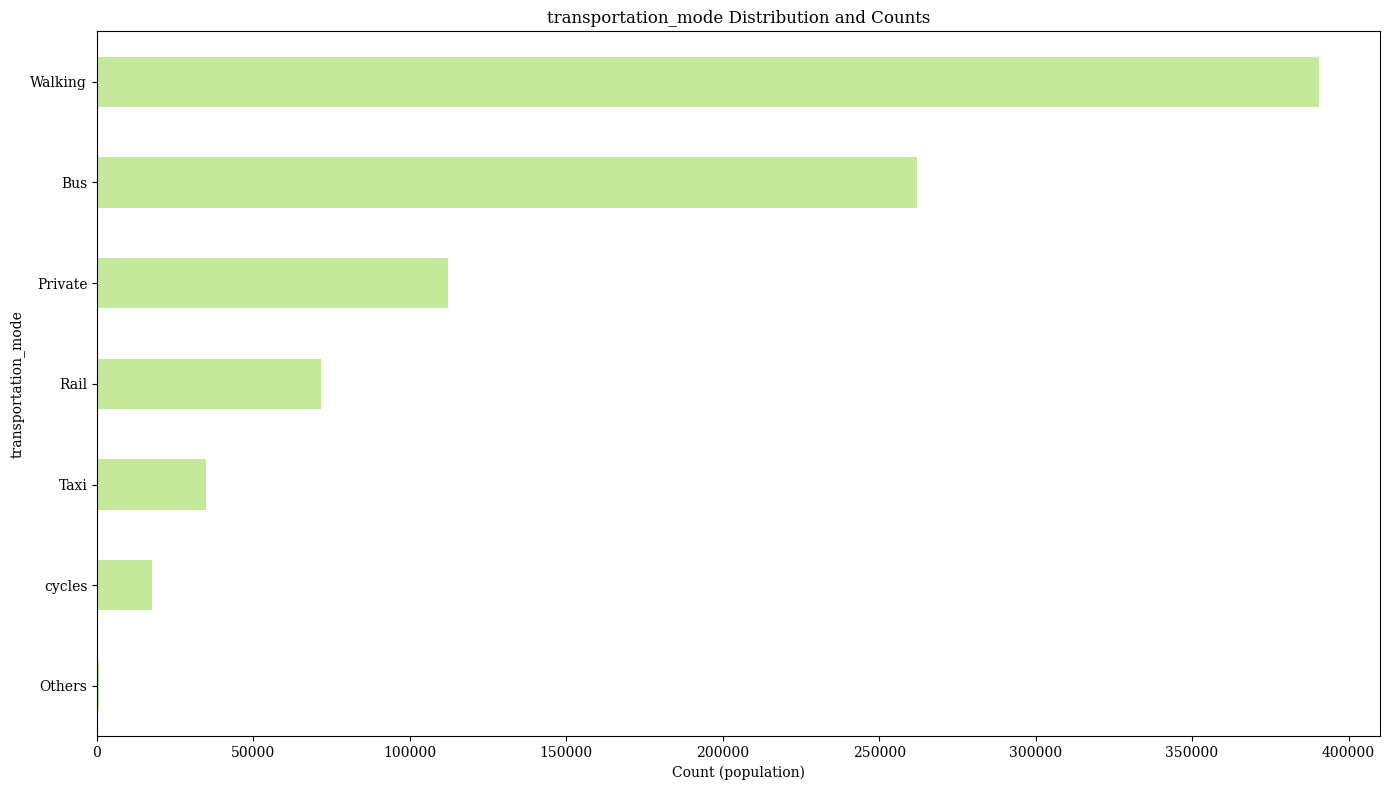

In [35]:
plot_bar_chart(test, 'transportation_mode')

p5_16_1_1(How much time to wait)

In [36]:
### 99 means he doesn't know, so we drop them ###
test = test[test['p5_16_1_1'] != 99] 
test = test.rename(columns={'p5_16_1_1': 'waiting_time'})

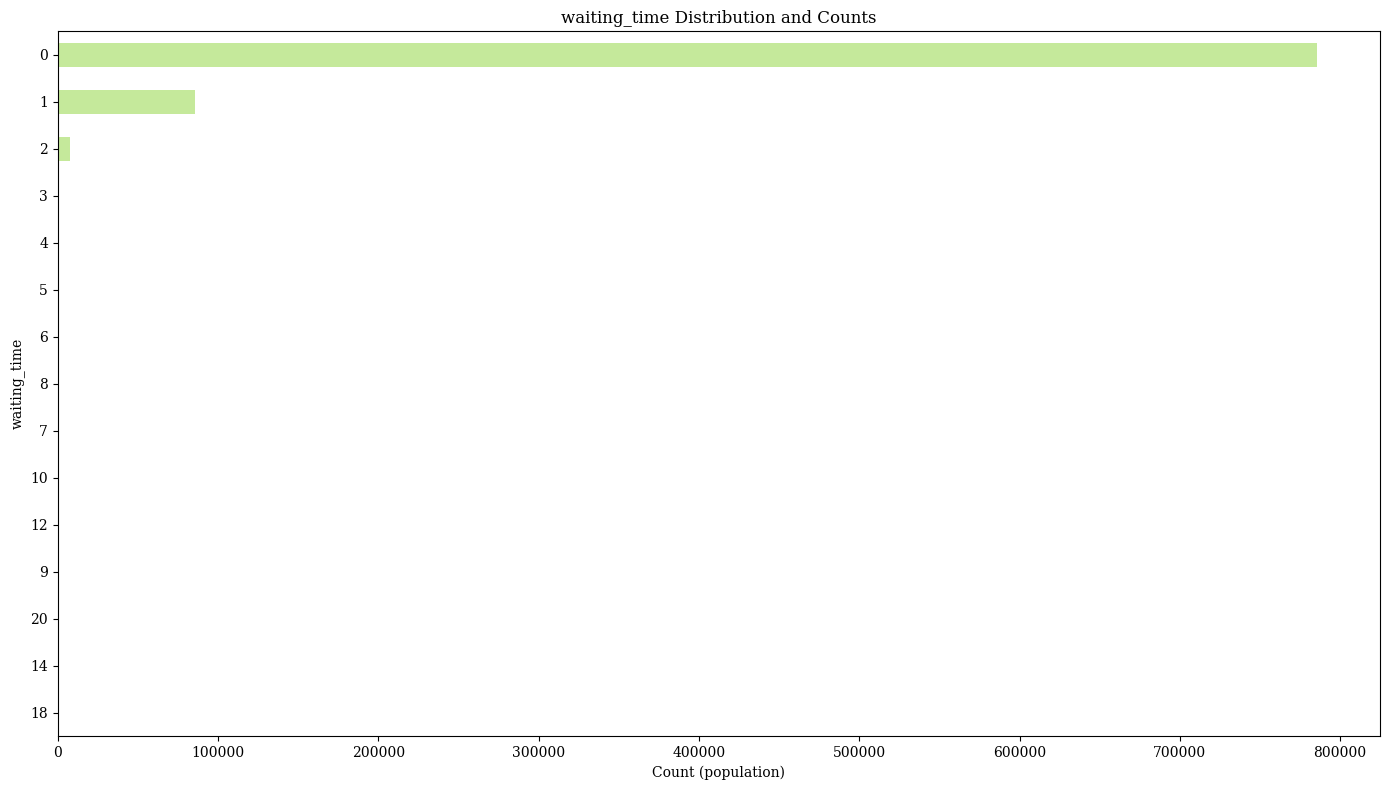

In [37]:
plot_bar_chart(test, 'waiting_time')

estrota(social class)

In [38]:
estrato_x = {
    1: "Low Class",
    2: "Lower-Medium Class",
    3: "Upper-Medium Class",
    4: "High Class"
}

test["estrato_x"] = test["estrato_x"].map(estrato_x)

In [39]:
test = test.rename(columns={'estrato_x': 'social_class'})

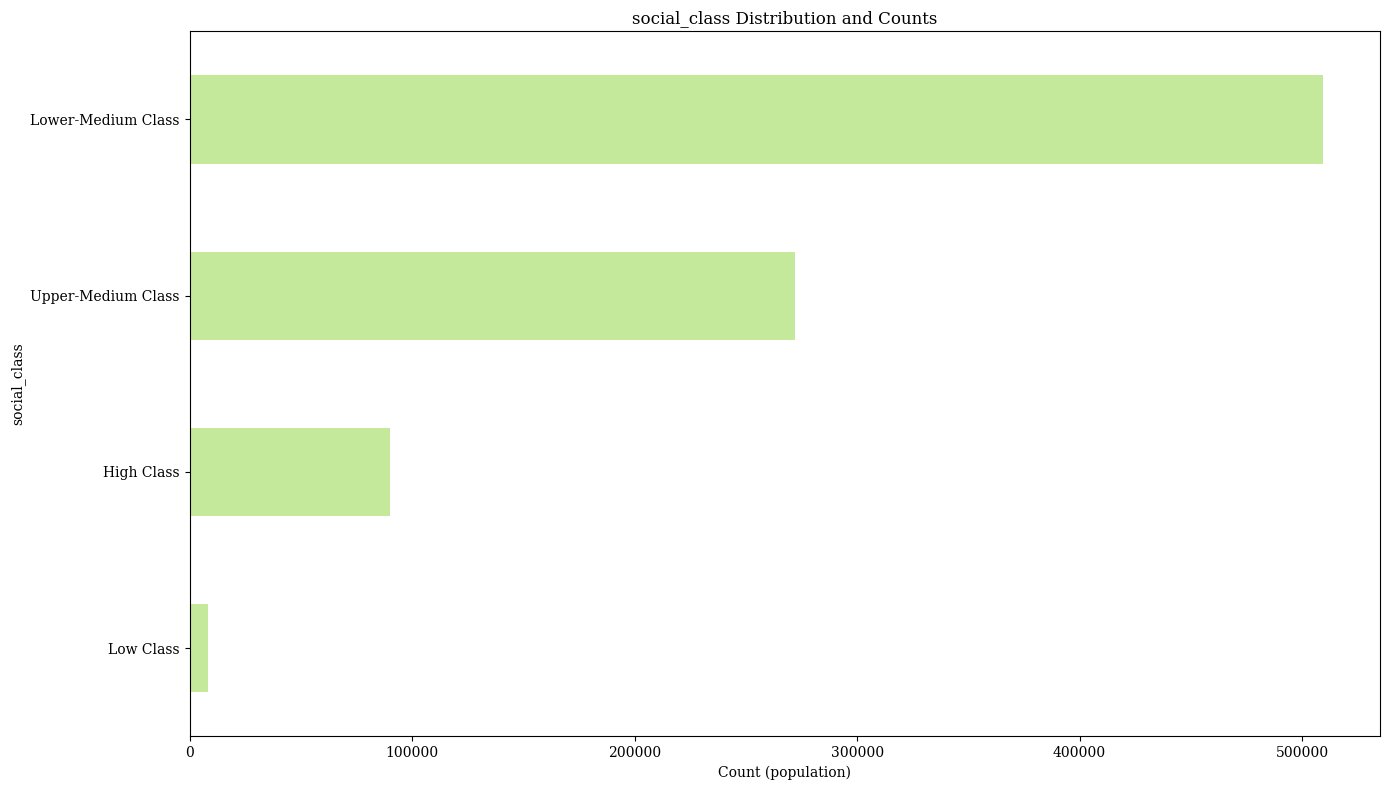

In [40]:
plot_bar_chart(test, 'social_class')

tloc_x(local size)

In [41]:
tloc_x = {
    1: "Over 100000 people",
    2: "From 15000 to 99999 people",
    3: "From 2500 to 14999 people",
    4: "less than 2500 people"
}

test["tloc_x"] = test["tloc_x"].map(tloc_x)

In [42]:
test = test.rename(columns={'tloc_x': 'local_size'})

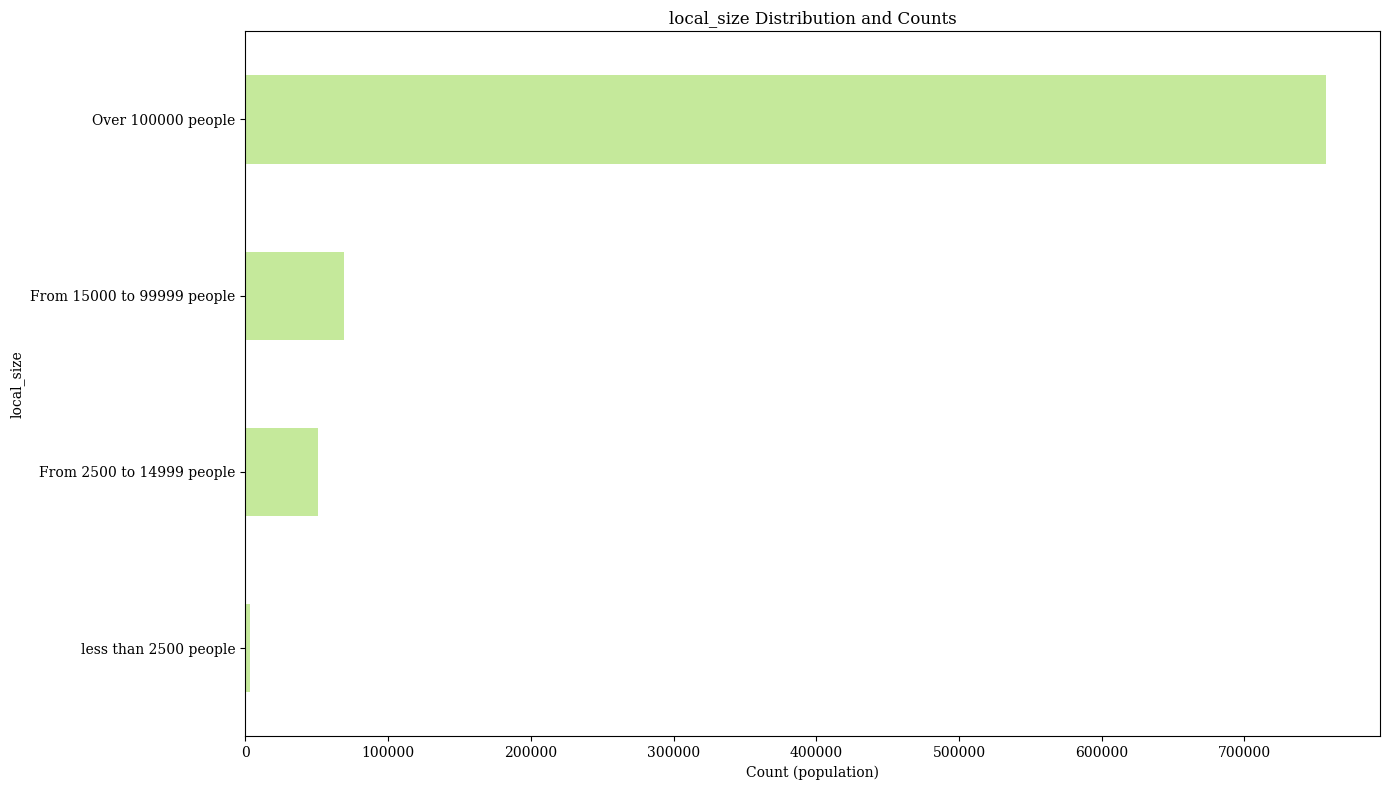

In [43]:
plot_bar_chart(test, 'local_size')

sexo_x(sex)

In [44]:
sexo_x = {
    1: "Male",
    2: "Female"
}

test["sexo_x"] = test["sexo_x"].map(sexo_x)

In [45]:
test = test.rename(columns={'sexo_x': 'sex'})

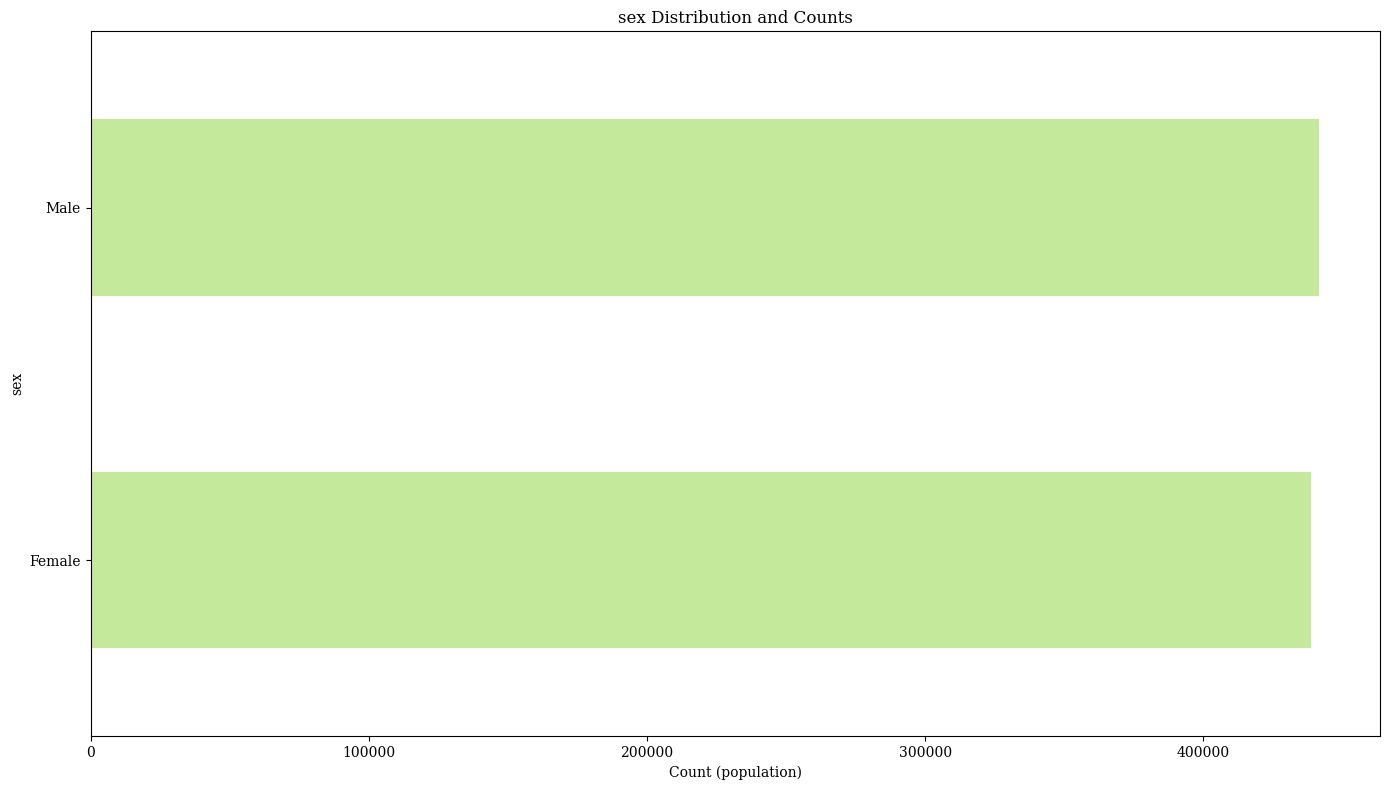

In [46]:
plot_bar_chart(test, 'sex')

edad_x(age)

In [47]:
### 99 means he doesn't know, so we drop them ###
test = test[test['edad_x'] != 99] 

In [48]:
def map_age_to_category(age):  
    if 0 <= age < 13:  
        return 'Child'  
    elif 13 <= age < 20:  
        return 'Teenager'  
    elif 20 <= age < 30:  
        return 'Young Adult'  
    elif 30 <= age < 45:  
        return 'Adult'  
    elif 45 <= age < 60:  
        return 'Middle-aged'  
    else:  
        return 'Senior' 

test['age'] = test['edad_x'].apply(map_age_to_category) 

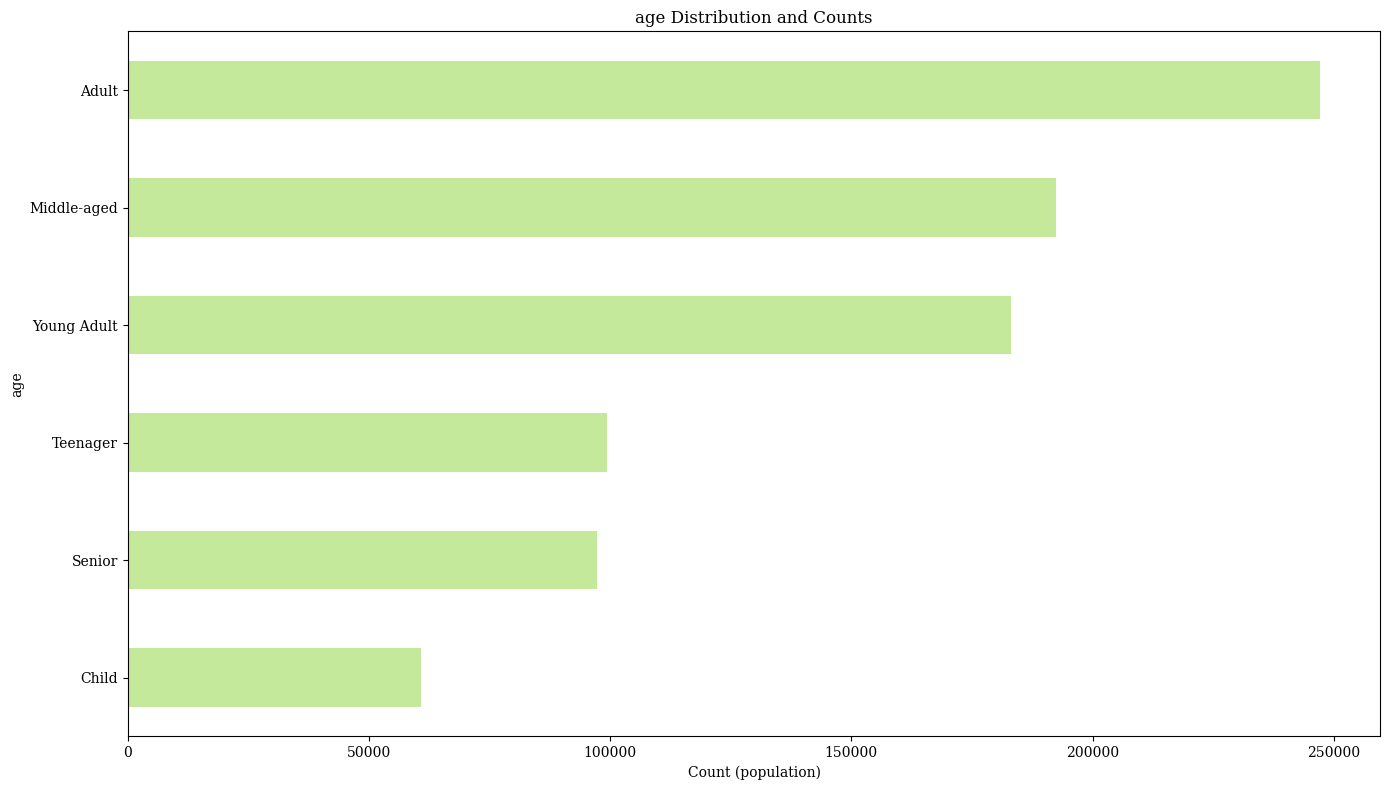

In [49]:
plot_bar_chart(test, 'age')

In [50]:
use_col = [
    "travel_purpose",
    "start_point",
    "end_point",
    "transportation_mode",
    "start_time",
    "end_time",
    "travel_time",
    "waiting_time",
    "social_class",
    "local_size",
    "sex",
    "age"
]

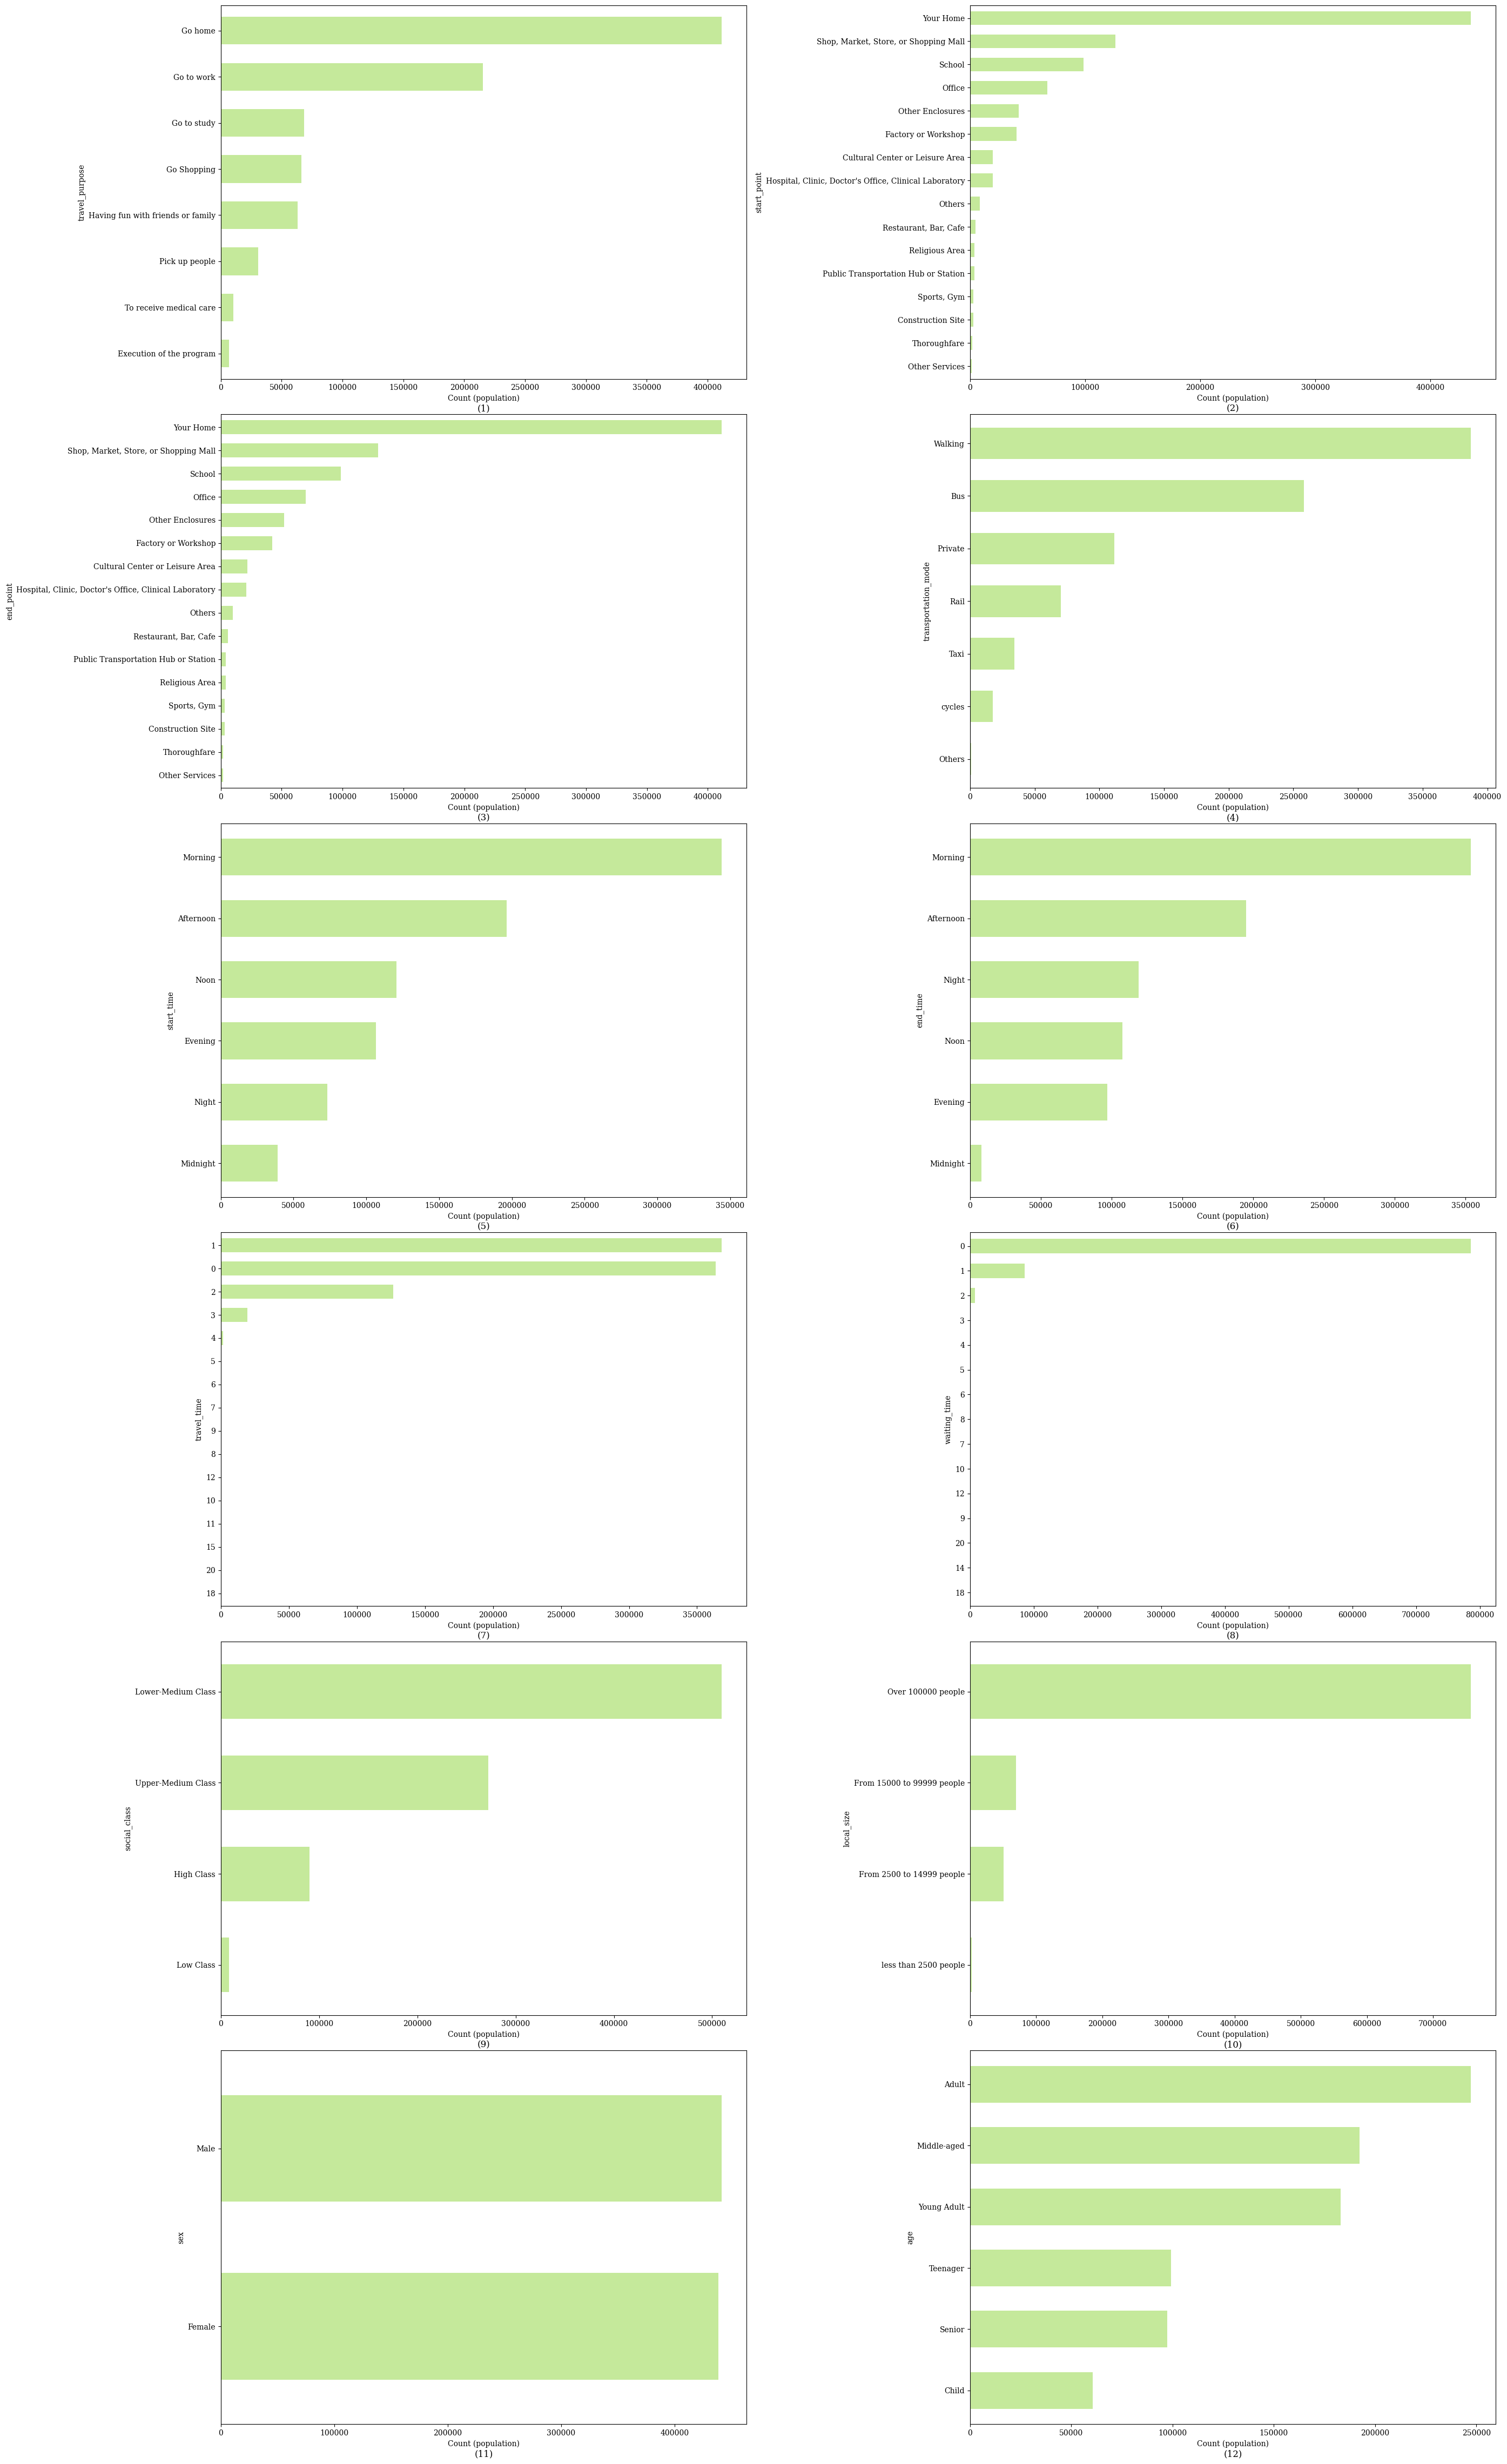

In [51]:
import matplotlib.pyplot as plt

def plot_all_columns(df, columns, width=14, height=8, bar_height=0.6, n_cols=2):
    # 确定需要绘制的列数
    num_plots = len(columns)
    
    # 计算行数，n_cols表示每行显示的图表数量
    n_rows = (num_plots + n_cols - 1) // n_cols  # 向上取整
    
    # 创建一个大图框
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(width * n_cols, height * n_rows))
    
    # 将axs调整为一维列表，以便逐个图表操作
    axs = axs.flatten()
    
    # 绘制每个列的图表
    for i, column_name in enumerate(columns):
        # 获取当前子图框
        ax = axs[i]
        
        # 计算类别计数并排序
        category_counts = df[column_name].value_counts().sort_values(ascending=True)
        
        # 绘制条形图
        category_counts.plot(kind='barh',
                             ax=ax,
                             color='#C5E99B',
                             legend=False,
                             width=bar_height)  # 设置条形图条的高度
        
        # 设置x轴和y轴的标签
        ax.set_xlabel('Count (population)')
        
        # 添加标题到子图的下方
        ax.text(0.5, -0.08, f'({i + 1})', transform=ax.transAxes, 
                ha='center', va='center', fontsize=12)

    # 删除多余的子图框（如果有）
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])
    
    # 调整布局以避免重叠
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    
    plt.savefig('count.png', bbox_inches='tight', dpi=300) 
    # 显示图形
    plt.show()

# 使用例子
# 假设你想在test DataFrame中的所有列上绘制图表
plot_all_columns(test, use_col, width=14, height=8, bar_height=0.6, n_cols=2)

### task 4: divide test dataset into different categories ###

In [52]:
test = test.loc[:, use_col]

In [53]:
test = test.dropna()
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 872749 entries, 0 to 890747
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   travel_purpose       872749 non-null  object
 1   start_point          872749 non-null  object
 2   end_point            872749 non-null  object
 3   transportation_mode  872749 non-null  object
 4   start_time           872749 non-null  object
 5   end_time             872749 non-null  object
 6   travel_time          872749 non-null  int64 
 7   waiting_time         872749 non-null  int64 
 8   social_class         872749 non-null  object
 9   local_size           872749 non-null  object
 10  sex                  872749 non-null  object
 11  age                  872749 non-null  object
dtypes: int64(2), object(10)
memory usage: 86.6+ MB


divide values by sex

In [65]:
def plot_all_features_by_sex(data):
    """
    Plot distribution of each feature in the dataframe by different levels of gender, with improved scale readability.

    Parameters:
        data (pd.DataFrame): The dataframe containing the accident data.
    """
    # Separate numeric and categorical columns
    numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
    
    # Combine both lists to ensure all columns are included
    all_cols = numeric_cols + categorical_cols

    # Determine the number of rows/columns based on the number of features
    n_cols = 3  # Number of columns in subplot grid
    n_rows = (len(all_cols) + n_cols - 1) // n_cols  # Calculate rows needed

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))  # Adjusted figsize for better display
    axes = axes.flatten()  # Flatten the axes array for easier iteration

    for i, col in enumerate(all_cols):
        ax = axes[i]
        if col in numeric_cols:
            # Plot numeric columns with histplot
            sns.histplot(data=data, x=col, hue="sex", element="step", stat="count", common_norm=False, ax=ax, palette="viridis")
        else:
            # Plot categorical columns with countplot
            sns.countplot(x=col, hue="sex", data=data, ax=ax, palette="viridis")
        
        ax.set_title(f"Distribution of {col} by Gender")
        ax.set_xlabel("")
        ax.set_ylabel("Count(population)")
                
        ax.text(0.5, -1, f'({i + 1})', transform=ax.transAxes, 
                ha='center', va='center', fontsize=12)
        
        # Rotate x-axis labels for better visibility
        for label in ax.get_xticklabels():
            label.set_rotation(45)
            label.set_ha("right")  # Align the labels horizontally right for better readability

        # Use MaxNLocator to avoid too many ticks on x-axis for numeric columns
        if col in numeric_cols:
            ax.xaxis.set_major_locator(MaxNLocator(nbins=6, prune="upper"))  # Adjust nbins as necessary

        # If data doesn't have enough features to fill all axes, break out of the loop
        if i == len(all_cols) - 1:
            break

    # Hide any unused axes if there are any
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust the spacing between plots
    plt.tight_layout()
    plt.savefig('sex.png', bbox_inches='tight', dpi=300) 
    plt.show()

# Assuming you have a DataFrame named 'data' that contains the necessary columns
# plot_all_features_by_sex(data)

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

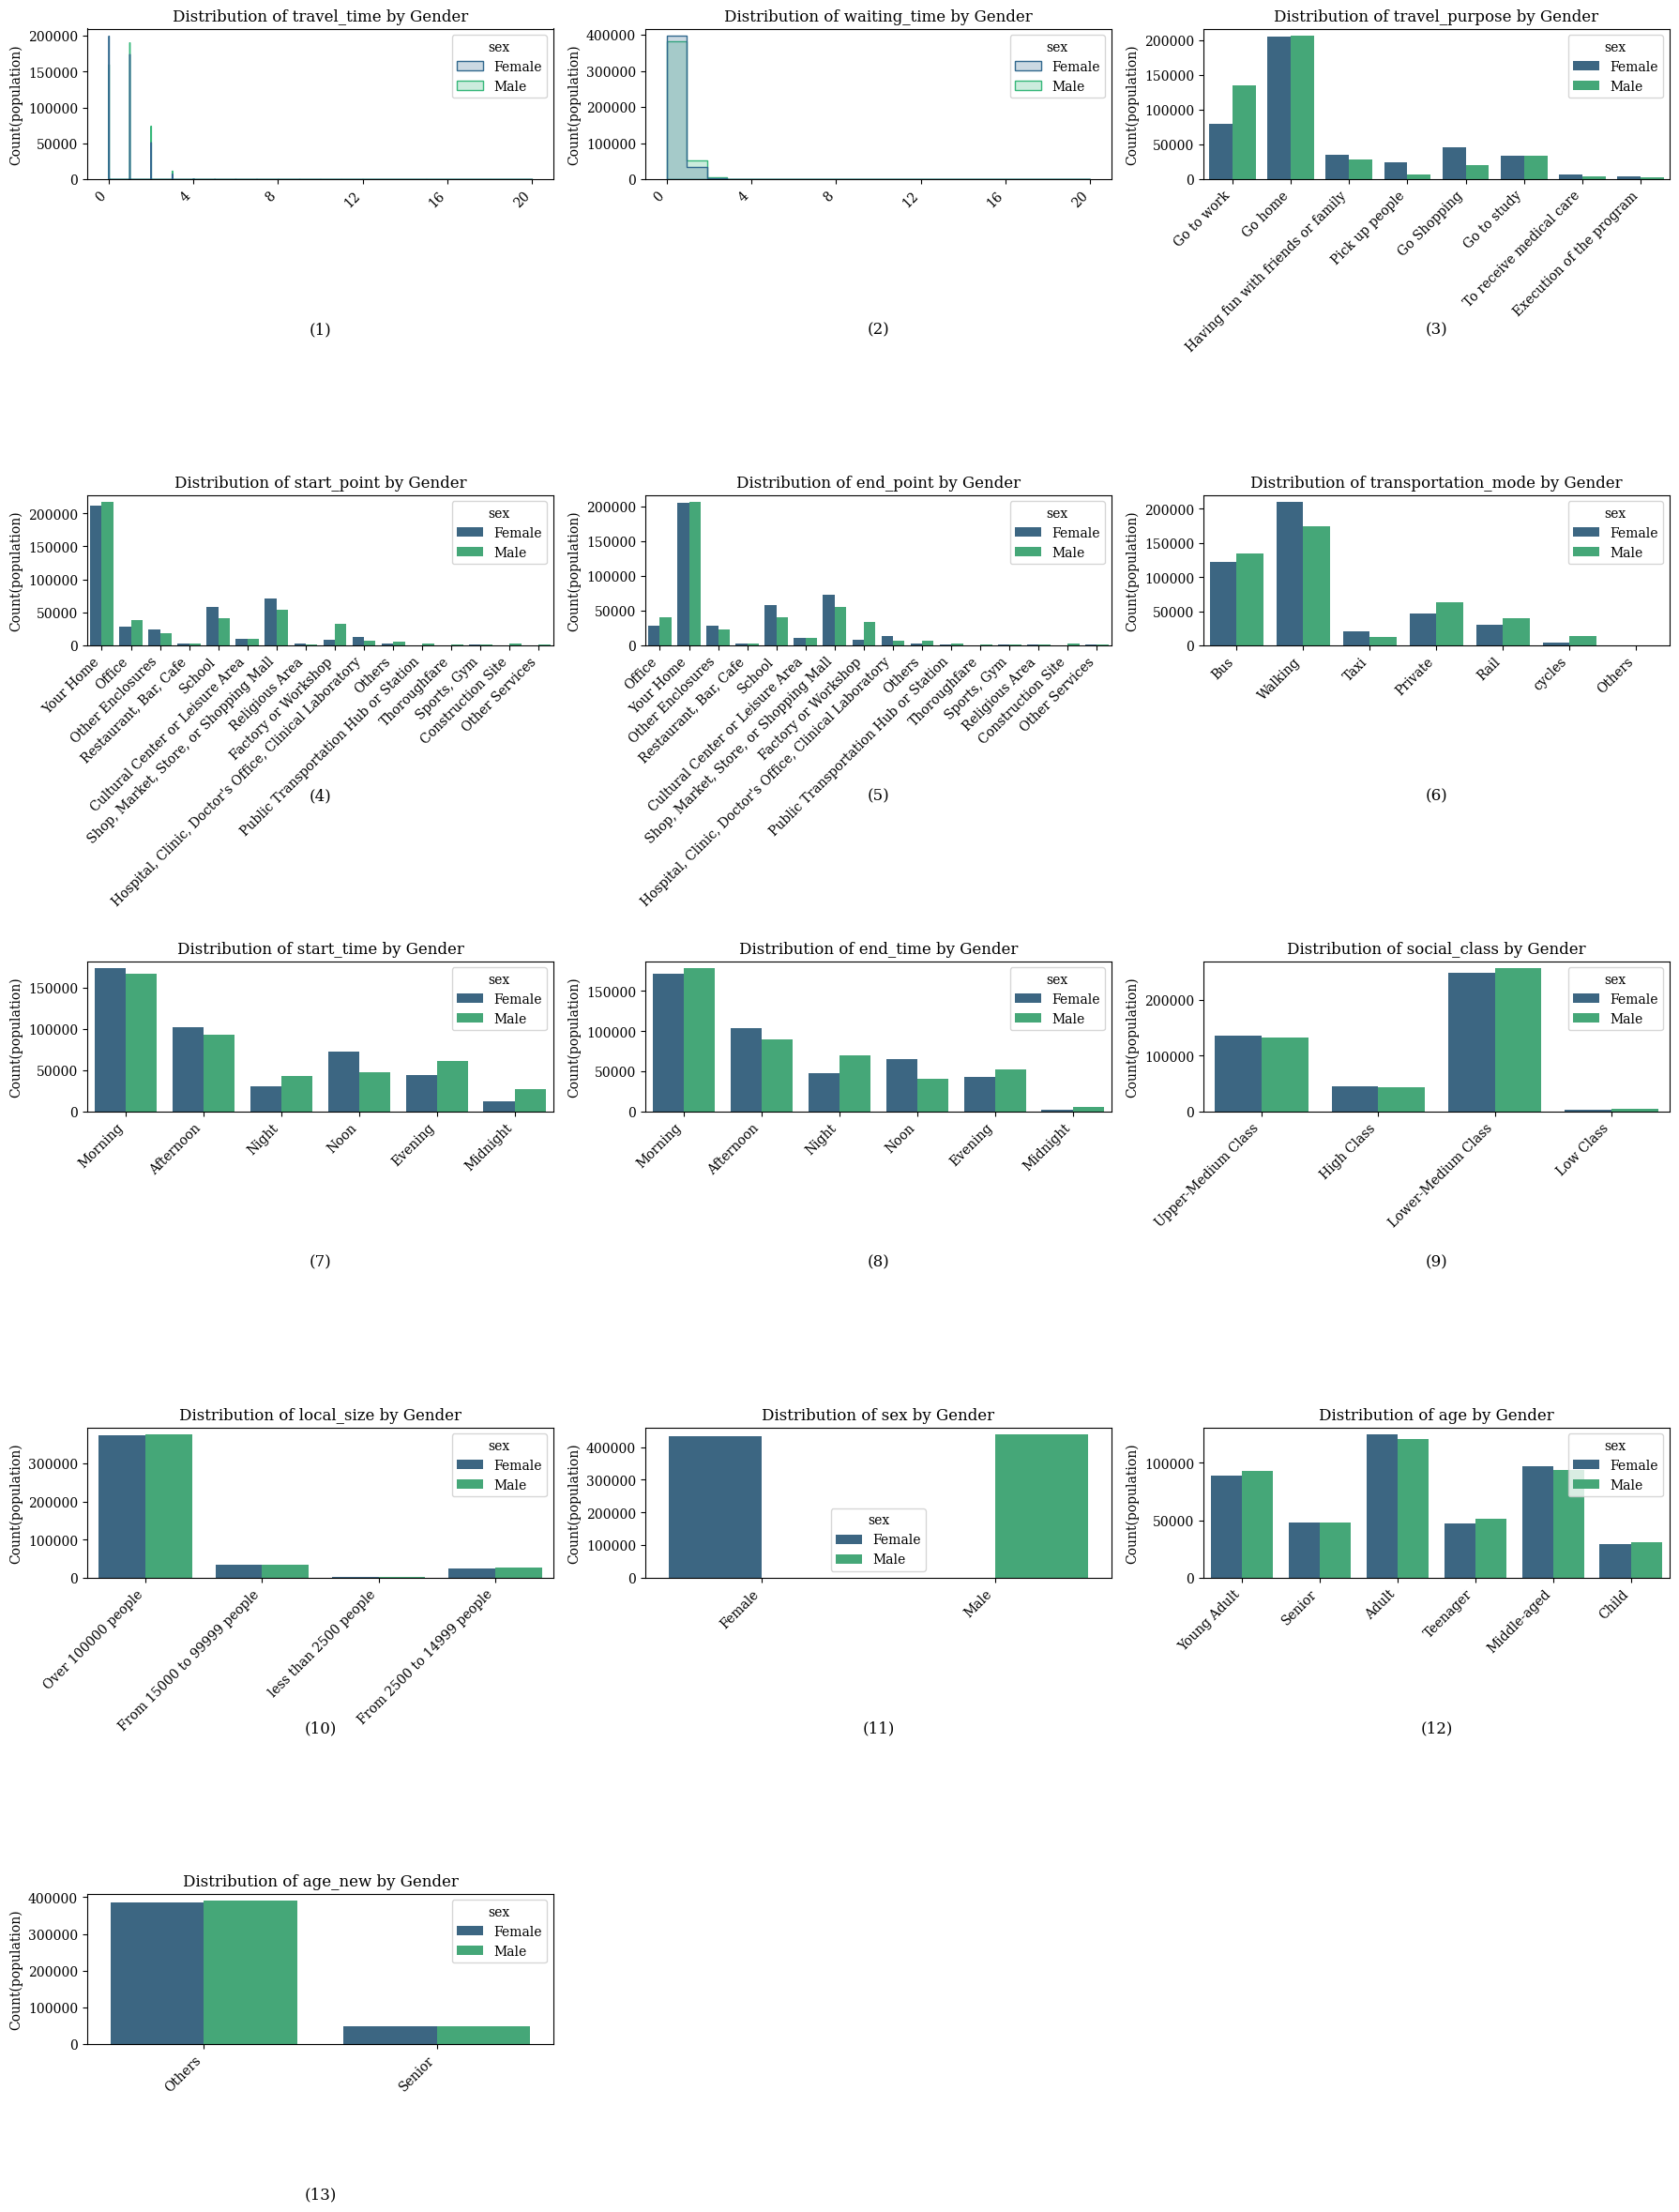

In [66]:
plot_all_features_by_sex(test)

divide by age

In [57]:
age_new ={
    'Child': 'Others',
    'Teenager' : 'Others',
    'Young Adult' : 'Others',
    'Adult':  'Others',
    'Middle-aged': 'Others',
    'Senior': 'Senior'
}


test['age_new'] = test['age'].map(age_new)

In [64]:
test.head()

,travel_purpose,start_point,end_point,transportation_mode,start_time,end_time,travel_time,waiting_time,social_class,local_size,sex,age,age_new
0,Go to work,Your Home,Office,Bus,Morning,Morning,1,0,Upper-Medium Class,Over 100000 people,Female,Young Adult,Others
1,Go to work,Your Home,Office,Walking,Morning,Morning,1,0,Upper-Medium Class,Over 100000 people,Female,Young Adult,Others
2,Go home,Office,Your Home,Bus,Afternoon,Afternoon,1,1,Upper-Medium Class,Over 100000 people,Female,Young Adult,Others
3,Go home,Office,Your Home,Walking,Afternoon,Afternoon,1,0,Upper-Medium Class,Over 100000 people,Female,Young Adult,Others
4,Having fun with friends or family,Your Home,Other Enclosures,Walking,Afternoon,Afternoon,0,0,Upper-Medium Class,Over 100000 people,Female,Young Adult,Others


In [67]:
def plot_all_features_by_age(data):
    """
    Plot distribution of each feature in the dataframe by different age groups, with improved scale readability.

    Parameters:
        data (pd.DataFrame): The dataframe containing the accident data.
    """
    # Separate numeric and categorical columns
    numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
    
    # Combine both lists to ensure all columns are included
    all_cols = numeric_cols + categorical_cols

    # Determine the number of rows/columns based on the number of features
    n_cols = 3  # Number of columns in subplot grid
    n_rows = (len(all_cols) + n_cols - 1) // n_cols  # Calculate rows needed

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))  # Adjusted figsize for better display
    axes = axes.flatten()  # Flatten the axes array for easier iteration

    for i, col in enumerate(all_cols):
        ax = axes[i]
        if col in numeric_cols:
            # Plot numeric columns with histplot
            sns.histplot(data=data, x=col, hue="age_new", element="step", stat="count", common_norm=False, ax=ax, palette="viridis")
        else:
            # Plot categorical columns with countplot
            sns.countplot(x=col, hue="age_new", data=data, ax=ax, palette="viridis")
        
        ax.set_title(f"Distribution of {col} by Age")
        ax.set_xlabel("")
        ax.set_ylabel("Count(population)")
                
        ax.text(0.5, -1, f'({i + 1})', transform=ax.transAxes, 
                ha='center', va='center', fontsize=12)

        # Rotate x-axis labels for better visibility
        for label in ax.get_xticklabels():
            label.set_rotation(45)
            label.set_ha("right")  # Align the labels horizontally right for better readability

        # Use MaxNLocator to avoid too many ticks on x-axis for numeric columns
        if col in numeric_cols:
            ax.xaxis.set_major_locator(MaxNLocator(nbins=6, prune="upper"))  # Adjust nbins as necessary

        # If data doesn't have enough features to fill all axes, break out of the loop
        if i == len(all_cols) - 1:
            break

    # Hide any unused axes if there are any
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust the spacing between plots
    plt.tight_layout()
    plt.savefig('age.png', bbox_inches='tight', dpi=300) 
    plt.show()

# Assuming you have a DataFrame named 'data' with an 'age_group' column
# plot_all_features_by_age(data)

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

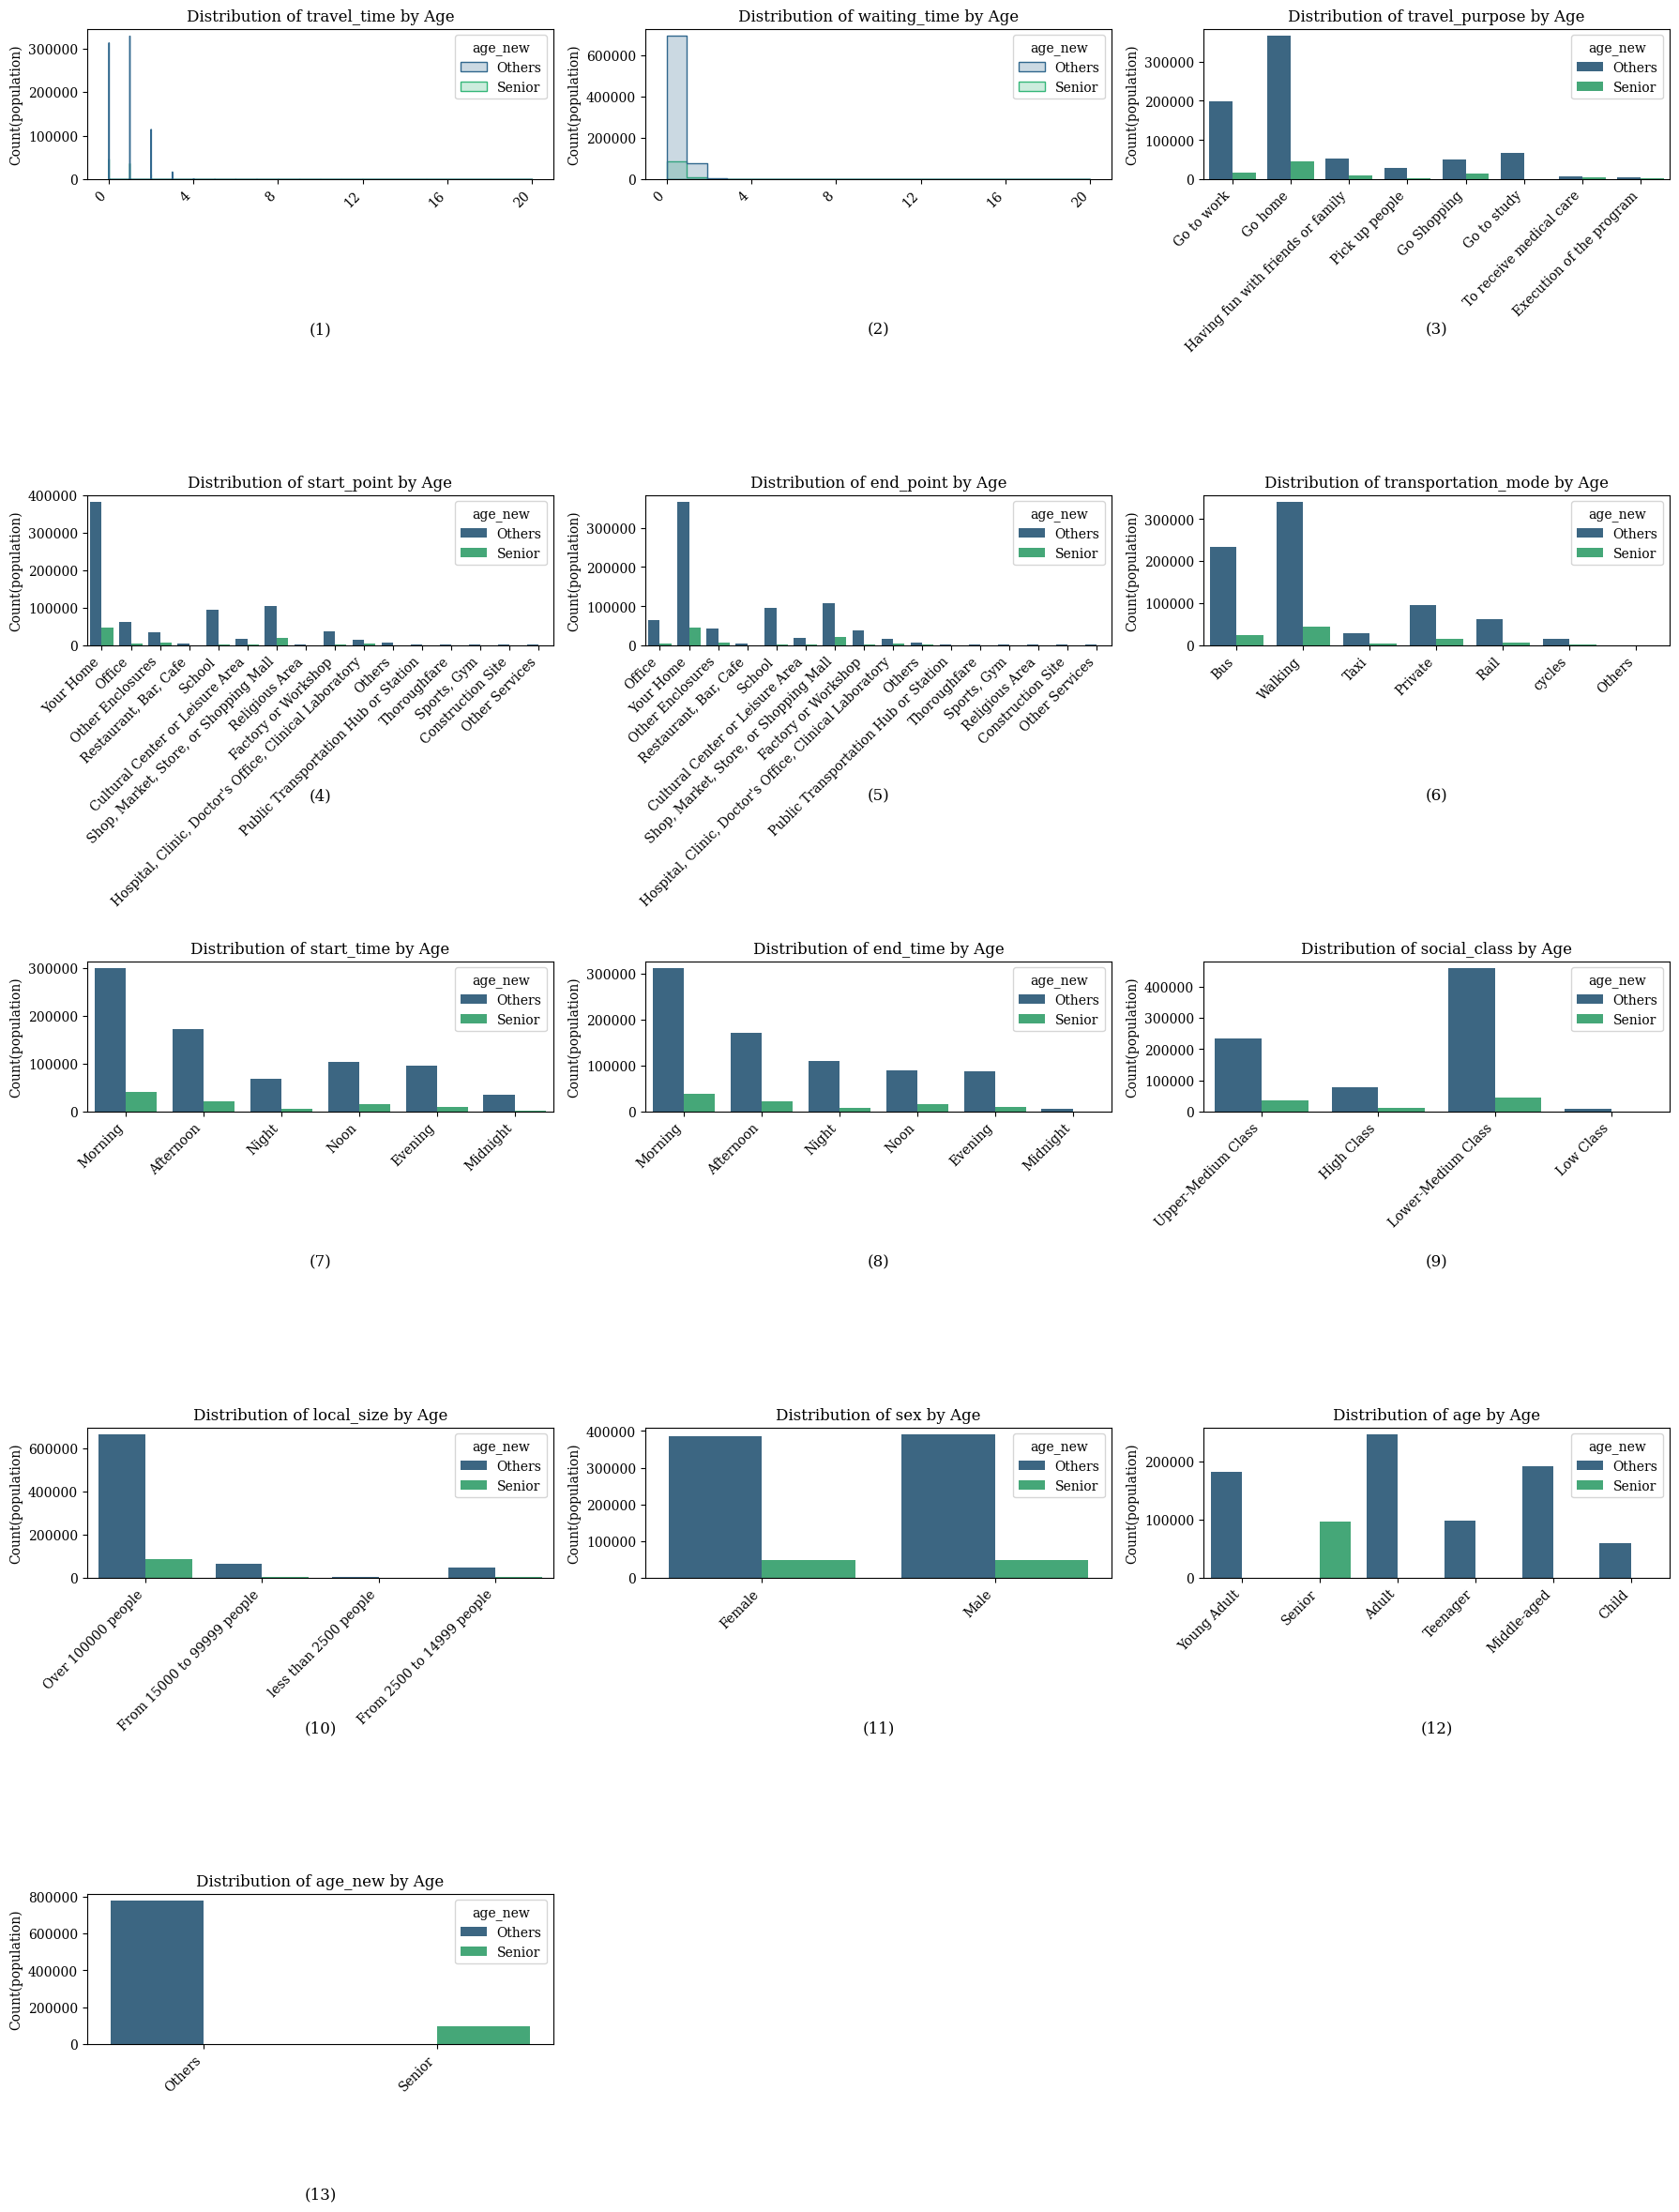

In [68]:
plot_all_features_by_age(test)

divide by social class

In [56]:
class_new ={
    "Low Class": "Lower Class",
    "Lower-Medium Class" : 'Lower Class',
    "Upper-Medium Class":  'Upper Class',
    "High Class": 'Upper Class'
}

test["class_new"] = test["social_class"].map(class_new)

In [69]:
def plot_all_features_by_social_class(data):
    """
    Plot distribution of each feature in the dataframe by different social classes, with improved scale readability.

    Parameters:
        data (pd.DataFrame): The dataframe containing the data.
    """
    # Separate numeric and categorical columns
    numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
    
    # Combine both lists to ensure all columns are included
    all_cols = numeric_cols + categorical_cols

    # Determine the number of rows/columns based on the number of features
    n_cols = 3  # Number of columns in subplot grid
    n_rows = (len(all_cols) + n_cols - 1) // n_cols  # Calculate rows needed

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))  # Adjusted figsize for better display
    axes = axes.flatten()  # Flatten the axes array for easier iteration

    # Get unique values from the social_class column
    social_class_labels = data['class_new'].unique()

    for i, col in enumerate(all_cols):
        ax = axes[i]
        if col in numeric_cols:
            # Plot numeric columns with histplot
            sns.histplot(data=data, x=col, hue="class_new", element="step", stat="count", common_norm=False, ax=ax, palette="viridis")
        else:
            # Plot categorical columns with countplot
            sns.countplot(x=col, hue="class_new", data=data, ax=ax, palette="viridis")
        
        ax.set_title(f"Distribution of {col} by Social Class")
        ax.set_xlabel("")
        ax.set_ylabel("Count(population)")
                
        ax.text(0.5, -1, f'({i + 1})', transform=ax.transAxes, 
                ha='center', va='center', fontsize=12)

        # Rotate x-axis labels for better visibility
        for label in ax.get_xticklabels():
            label.set_rotation(45)
            label.set_ha("right")  # Align the labels horizontally right for better readability

        # Use MaxNLocator to avoid too many ticks on x-axis for numeric columns
        if col in numeric_cols:
            ax.xaxis.set_major_locator(MaxNLocator(nbins=6, prune="upper"))  # Adjust nbins as necessary

        # If data doesn't have enough features to fill all axes, break out of the loop
        if i == len(all_cols) - 1:
            break

    # Hide any unused axes if there are any
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust the spacing between plots
    plt.tight_layout()
    plt.savefig('social_class.png', bbox_inches='tight', dpi=300) 
    plt.show()

# Assuming you have a DataFrame named 'data' with a 'social_class' column
# plot_all_features_by_social_class(data)

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

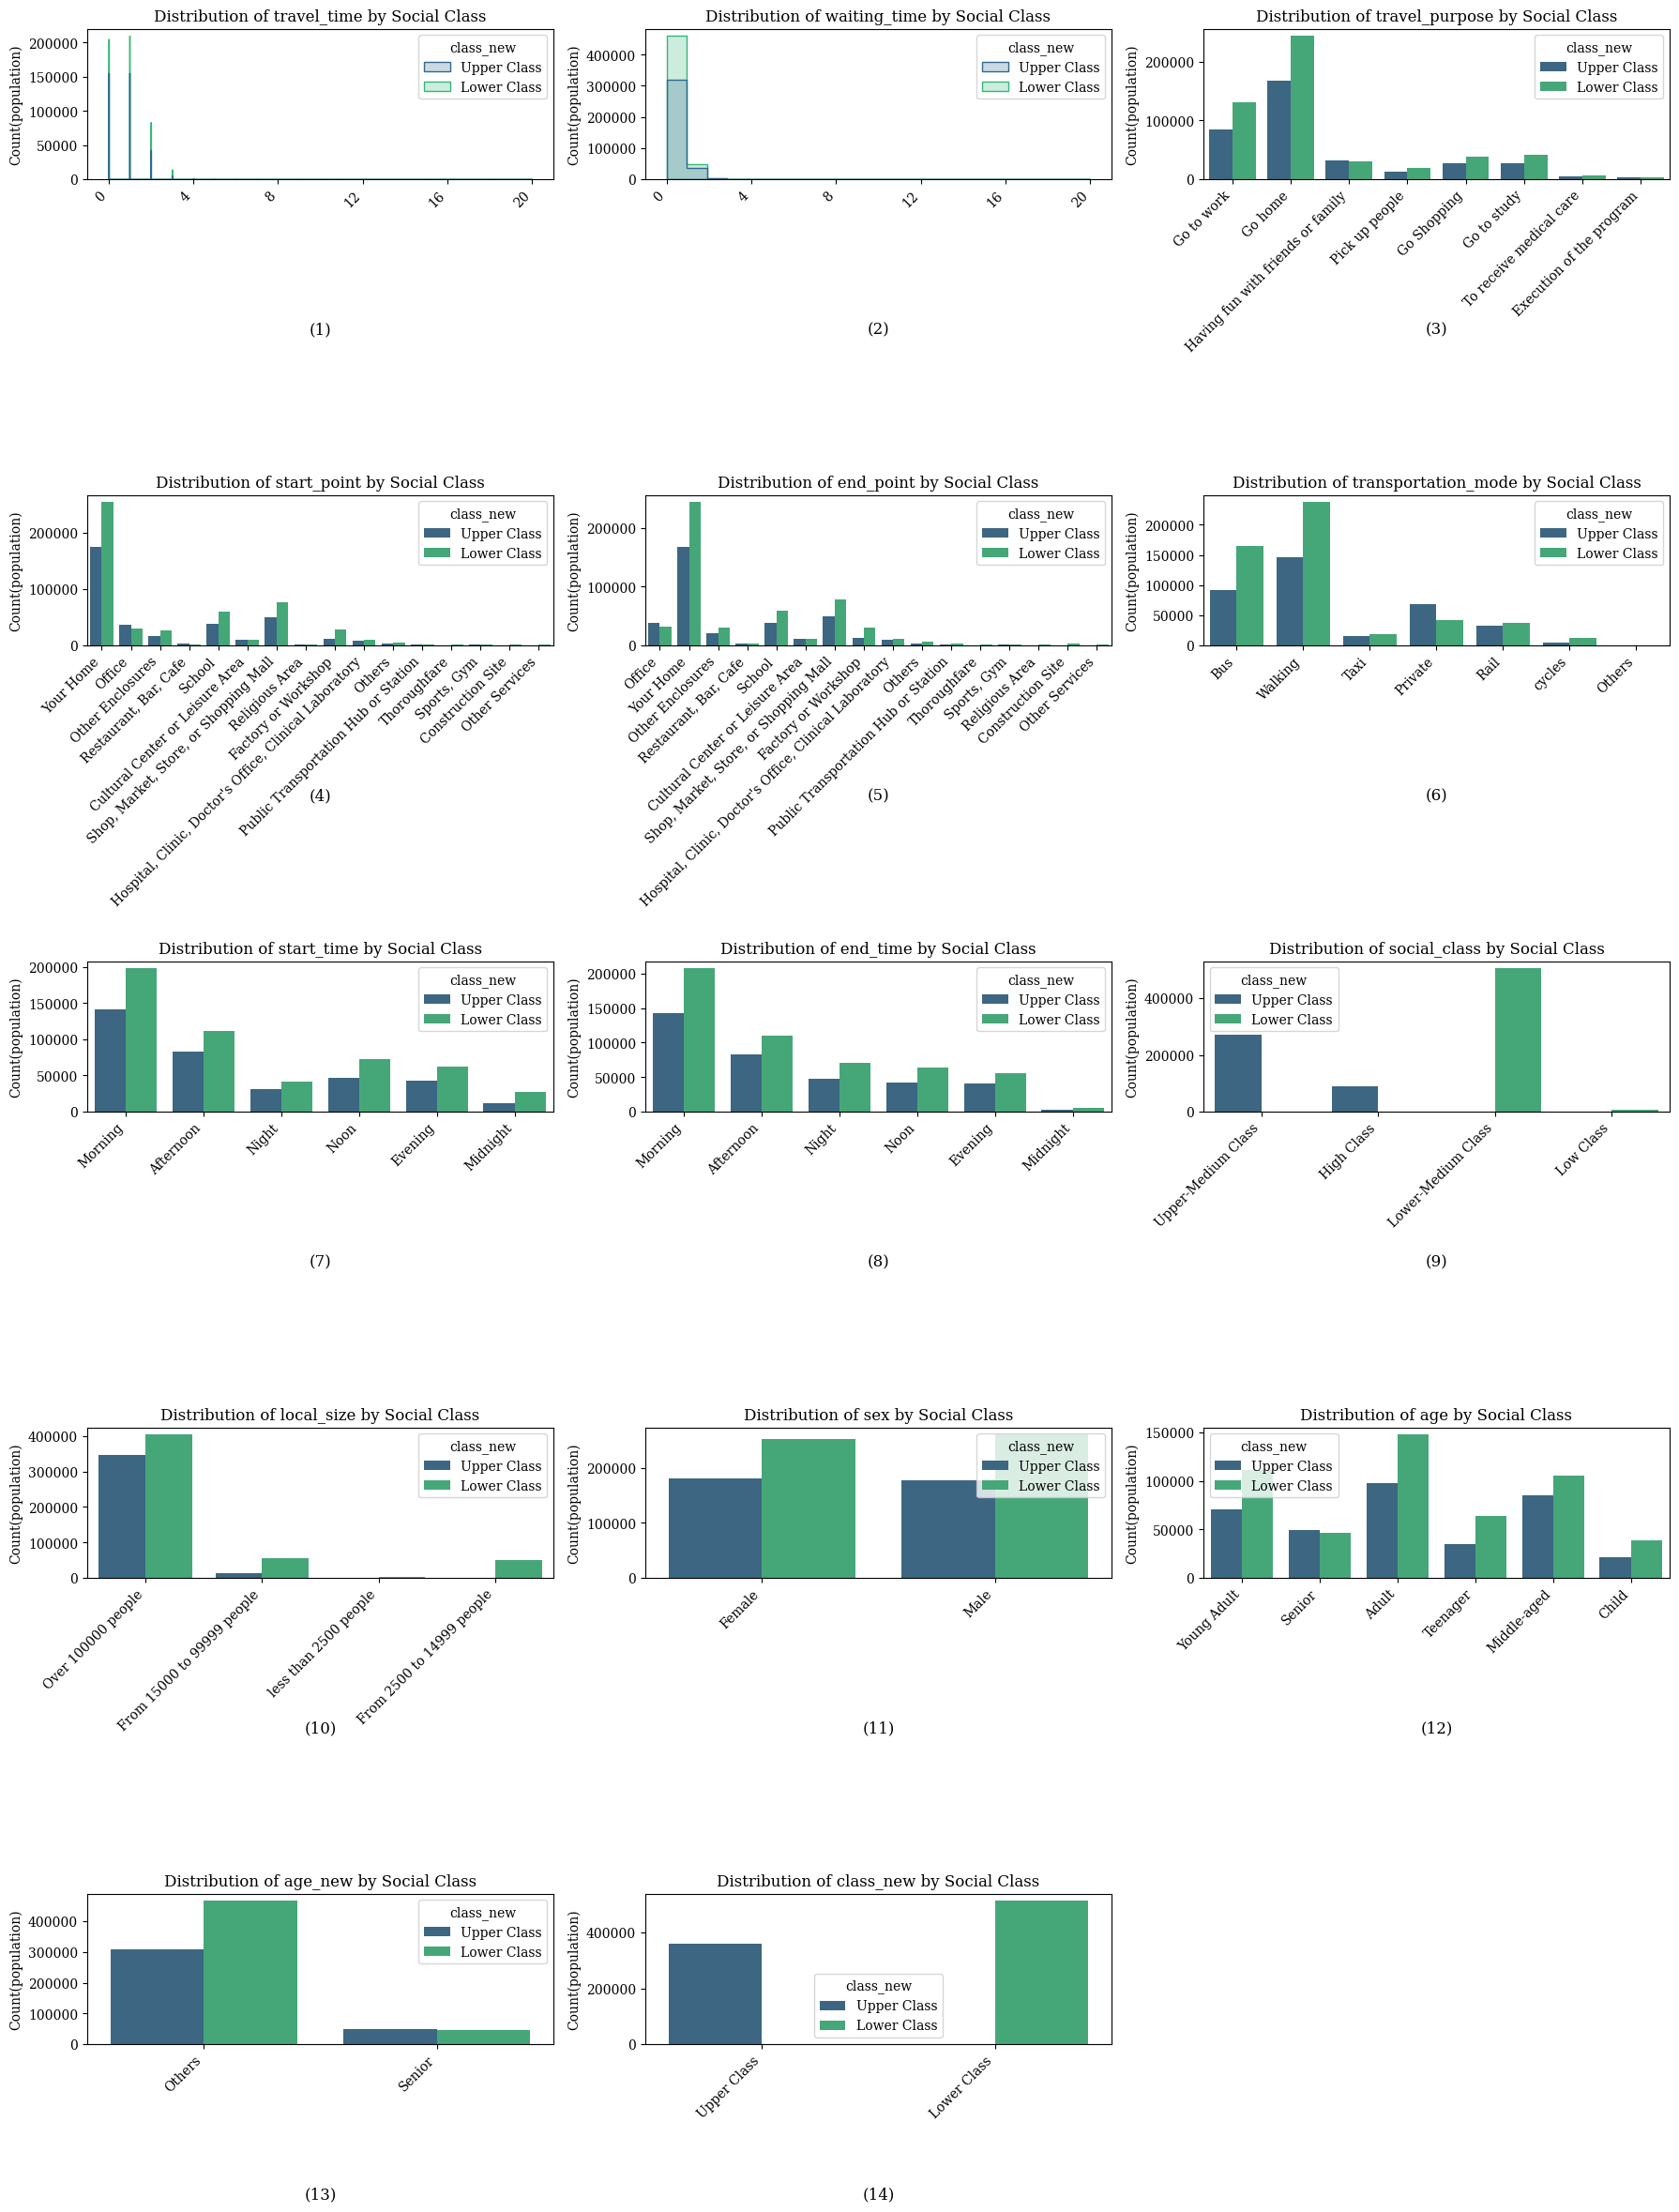

In [71]:
plot_all_features_by_social_class(test)

divide by local size

In [55]:
size_new ={
    "Over 100000 people": "Large Size",
    "From 15000 to 99999 people" : 'Large Size',
    'From 2500 to 14999 people' : 'Small Size',
    "less than 2500 people":  'Small Size'
}

test["size_new"] = test["local_size"].map(size_new)

In [73]:
def plot_all_features_by_local_size(data):
    """
    Plot distribution of each feature in the dataframe by different local sizes, with improved scale readability.

    Parameters:
        data (pd.DataFrame): The dataframe containing the data.
    """
    # Separate numeric and categorical columns
    numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
    
    # Combine both lists to ensure all columns are included
    all_cols = numeric_cols + categorical_cols

    # Determine the number of rows/columns based on the number of features
    n_cols = 3  # Number of columns in subplot grid
    n_rows = (len(all_cols) + n_cols - 1) // n_cols  # Calculate rows needed

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))  # Adjusted figsize for better display
    axes = axes.flatten()  # Flatten the axes array for easier iteration

    for i, col in enumerate(all_cols):
        ax = axes[i]
        if col in numeric_cols:
            # Plot numeric columns with histplot
            sns.histplot(data=data, x=col, hue="size_new", element="step", stat="count", common_norm=False, ax=ax, palette="viridis")
        else:
            # Plot categorical columns with countplot
            sns.countplot(x=col, hue="size_new", data=data, ax=ax, palette="viridis")
        
        ax.set_title(f"Distribution of {col} by Local Size")
        ax.set_xlabel("")
        ax.set_ylabel("Count(population)")
                
        ax.text(0.5, -1, f'({i + 1})', transform=ax.transAxes, 
                ha='center', va='center', fontsize=12)

        # Rotate x-axis labels for better visibility
        for label in ax.get_xticklabels():
            label.set_rotation(45)
            label.set_ha("right")  # Align the labels horizontally right for better readability

        # Use MaxNLocator to avoid too many ticks on x-axis for numeric columns
        if col in numeric_cols:
            ax.xaxis.set_major_locator(MaxNLocator(nbins=6, prune="upper"))  # Adjust nbins as necessary

        # If data doesn't have enough features to fill all axes, break out of the loop
        if i == len(all_cols) - 1:
            break

    # Hide any unused axes if there are any
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust the spacing between plots
    plt.tight_layout()
    plt.savefig('local_size.png', bbox_inches='tight', dpi=300) 
    plt.show()

# Assuming you have a DataFrame named 'data' with a 'local_size' column
# plot_all_features_by_local_size(data)

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

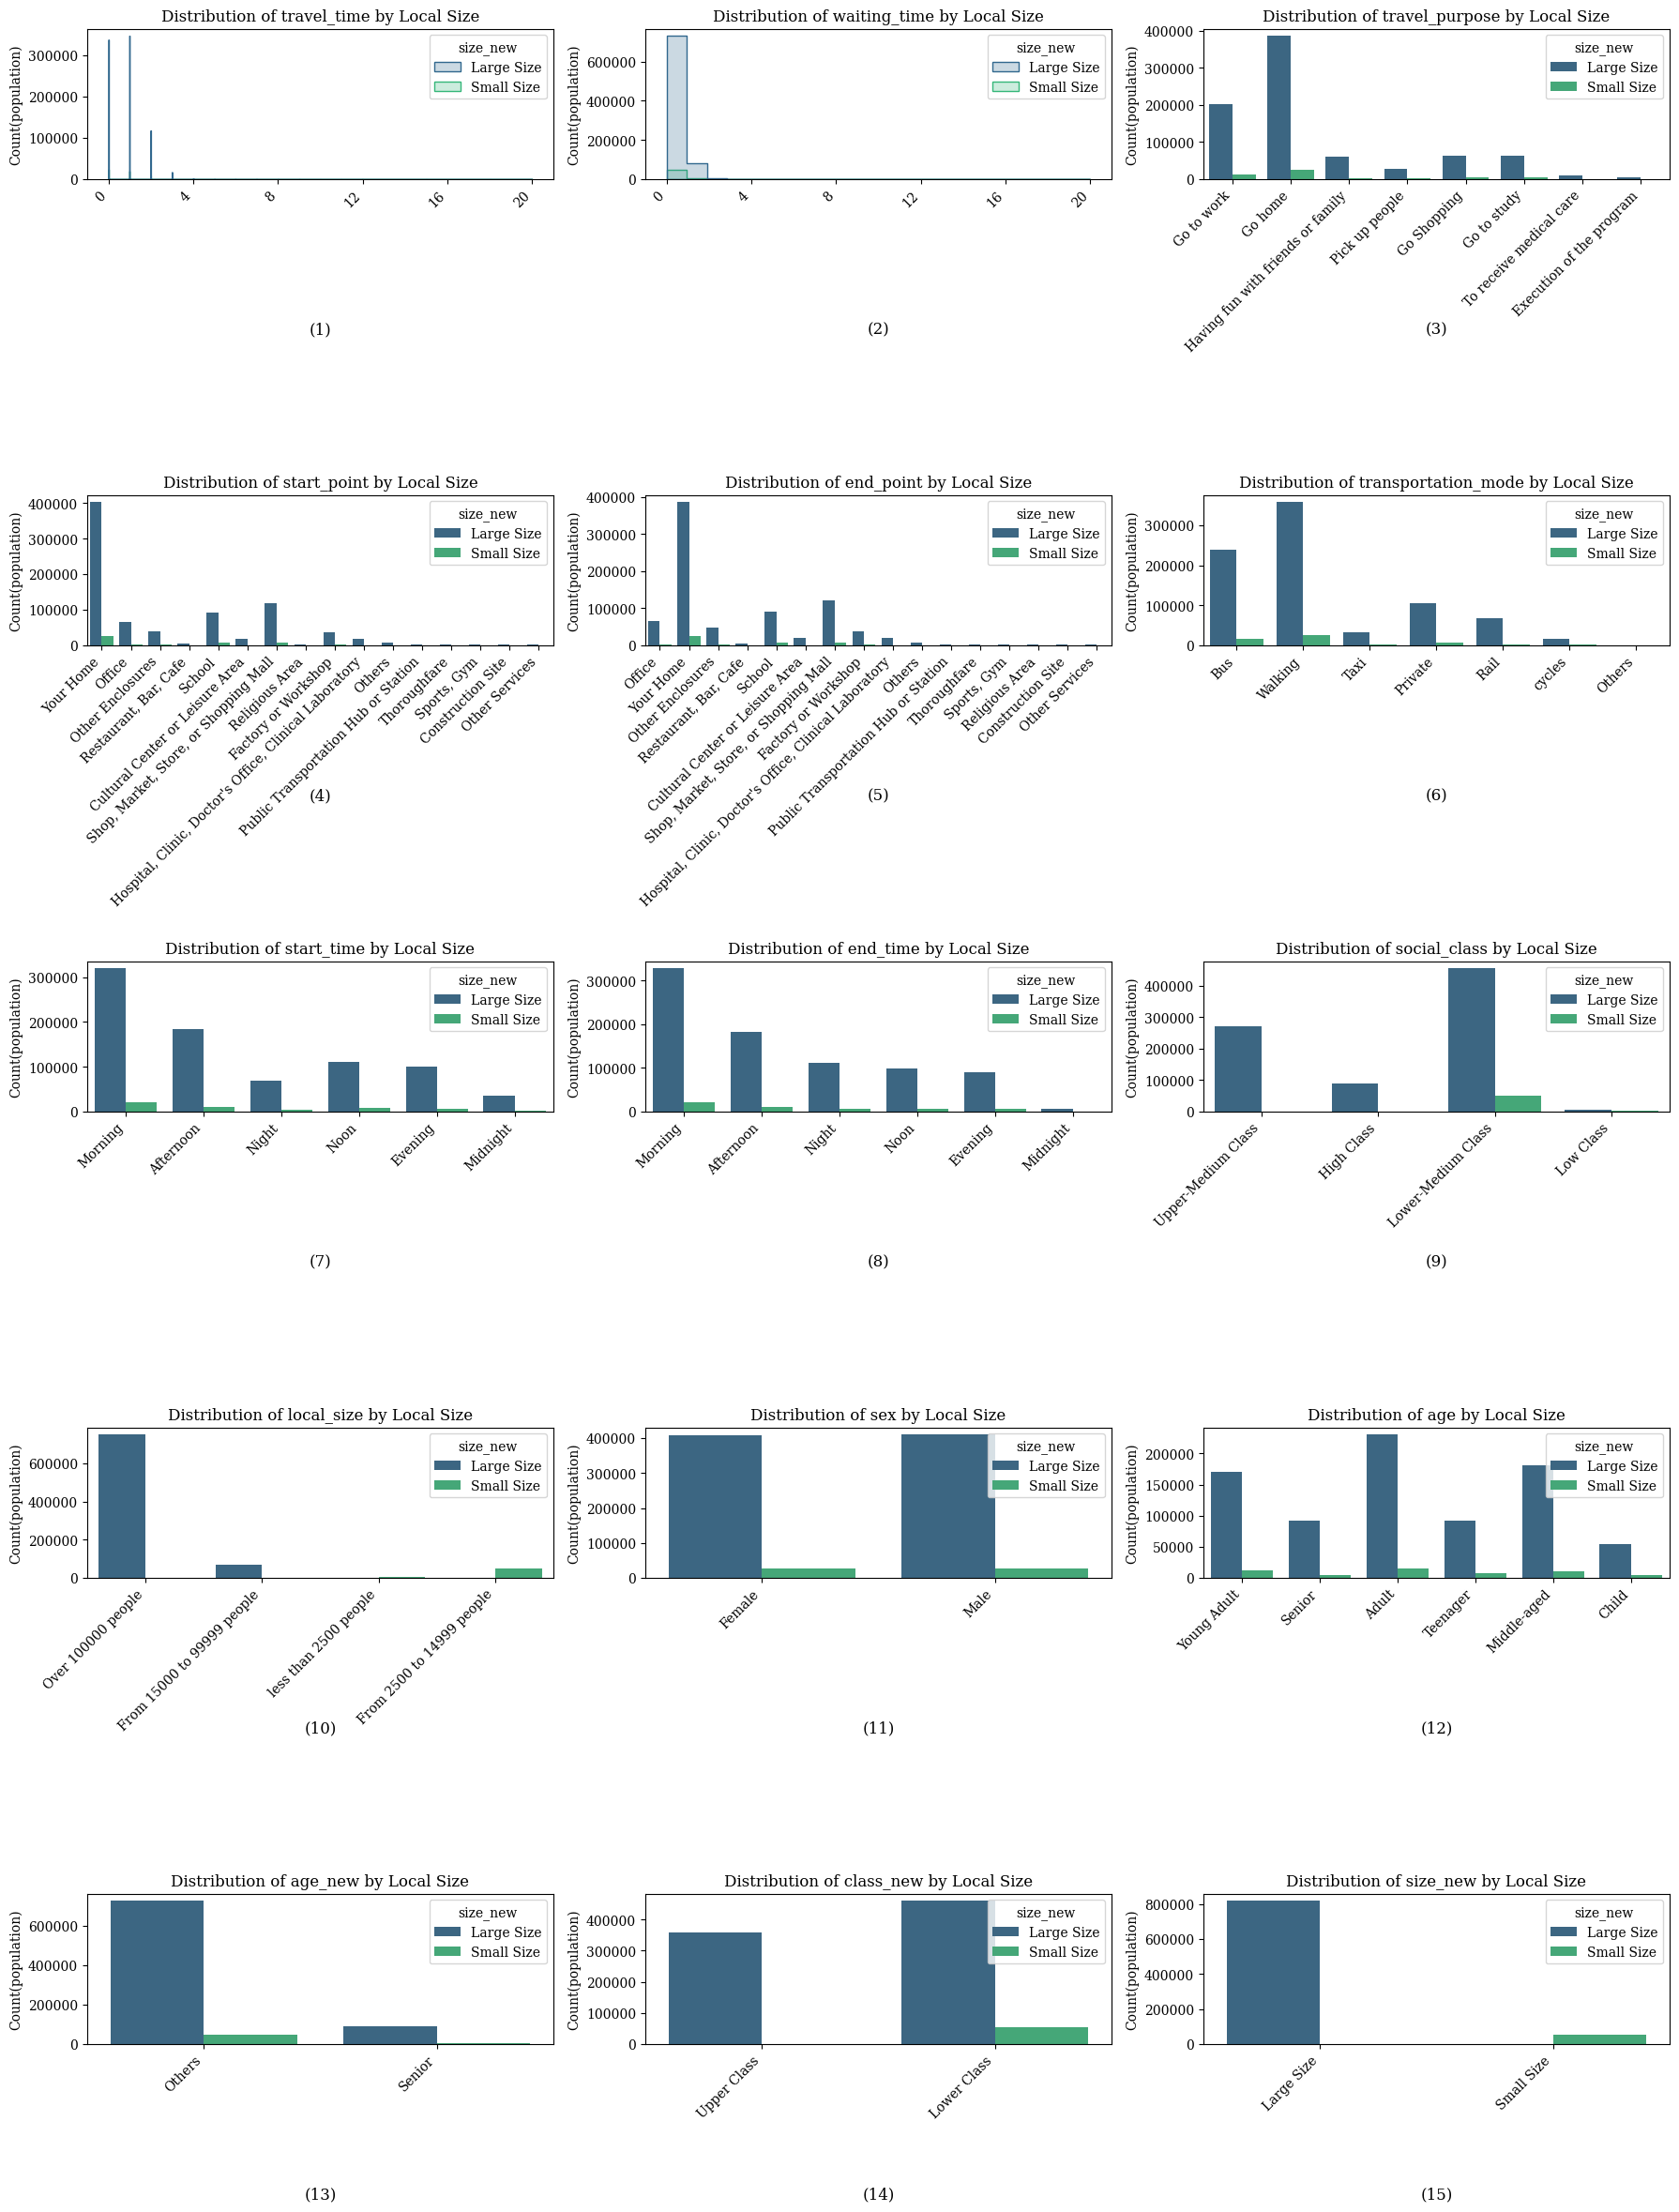

In [74]:
plot_all_features_by_local_size(test)

### task 5: Chi-Square Test ###

In [54]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 872749 entries, 0 to 890747
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   travel_purpose       872749 non-null  object
 1   start_point          872749 non-null  object
 2   end_point            872749 non-null  object
 3   transportation_mode  872749 non-null  object
 4   start_time           872749 non-null  object
 5   end_time             872749 non-null  object
 6   travel_time          872749 non-null  int64 
 7   waiting_time         872749 non-null  int64 
 8   social_class         872749 non-null  object
 9   local_size           872749 non-null  object
 10  sex                  872749 non-null  object
 11  age                  872749 non-null  object
dtypes: int64(2), object(10)
memory usage: 86.6+ MB


In [58]:
def compute_chi_square_and_cramers_v(data, target_col):
    """
    Compute Chi-Square statistic and Cramer's V for the target column against all other categorical columns in the DataFrame.

    Parameters:
        data (pd.DataFrame): The DataFrame containing the data.
        target_col (str): The name of the target column (e.g., 'age').

    Returns:
        pd.DataFrame: A DataFrame containing the Chi-Square statistic, p-value, and Cramer's V for each categorical column.
    """
    results = []

    # Iterate over all columns except the target column
    for col in data.columns:
        # Skip the target column and exclude numeric columns
        if col == target_col or pd.api.types.is_numeric_dtype(data[col]):
            continue
        
        # Create contingency table
        contingency_table = pd.crosstab(data[target_col], data[col])

        # Calculate Chi-Square statistics
        stat, p, dof, expected = chi2_contingency(contingency_table)
        
        # Calculate Cramer's V
        n = np.sum(contingency_table.values)
        min_dim = min(contingency_table.shape[0] - 1, contingency_table.shape[1] - 1)
        cramers_v = np.sqrt(stat / (n * min_dim))
        
        # Append the results
        results.append({
            'Variable': col,
            'Chi-Square Statistic': stat,
            'p-value': p,
            'Cramers V': cramers_v
        })
    
    # Convert the results to a DataFrame for better display
    results_df = pd.DataFrame(results)
    
    return results_df


# Example usage with your DataFrame `test` and the target column 'sex'
result_df = compute_chi_square_and_cramers_v(test, 'sex')
print(result_df)

               Variable  Chi-Square Statistic        p-value  Cramers V
0        travel_purpose          35042.798241   0.000000e+00   0.200380
1           start_point          28902.388504   0.000000e+00   0.181979
2             end_point          30685.160958   0.000000e+00   0.187508
3   transportation_mode          14638.216922   0.000000e+00   0.129509
4            start_time          16173.825346   0.000000e+00   0.136132
5              end_time          14431.112334   0.000000e+00   0.128589
6          social_class            243.942610   1.336253e-52   0.016719
7            local_size             66.281985   2.667459e-14   0.008715
8                   age            511.828755  2.232785e-108   0.024217
9              size_new             60.758724   6.451656e-15   0.008344
10            class_new            194.999111   2.577540e-44   0.014948
11              age_new              4.741145   2.944946e-02   0.002331


In [59]:
# Example usage with your DataFrame `test` and the target column 'age'
result_df = compute_chi_square_and_cramers_v(test, 'age')
print(result_df)

               Variable  Chi-Square Statistic        p-value  Cramers V
0        travel_purpose         212740.852901   0.000000e+00   0.220798
1           start_point         119816.666744   0.000000e+00   0.165702
2             end_point         118631.201329   0.000000e+00   0.164881
3   transportation_mode          23898.140923   0.000000e+00   0.074004
4            start_time          29605.741817   0.000000e+00   0.082368
5              end_time          29924.812608   0.000000e+00   0.082811
6          social_class           7908.258478   0.000000e+00   0.054959
7            local_size           2908.525379   0.000000e+00   0.033330
8                   sex            511.828755  2.232785e-108   0.024217
9              size_new           1746.330997   0.000000e+00   0.044732
10            class_new           7475.618195   0.000000e+00   0.092551
11              age_new         872749.000000   0.000000e+00   1.000000


In [77]:
# Example usage with your DataFrame `test` and the target column 'social_class'
result_df = compute_chi_square_and_cramers_v(test, 'social_class')
print(result_df)

               Variable  Chi-Square Statistic        p-value  Cramers V
0        travel_purpose           4865.226513   0.000000e+00   0.043107
1           start_point          12770.411563   0.000000e+00   0.069839
2             end_point          12491.220825   0.000000e+00   0.069071
3   transportation_mode          53170.912503   0.000000e+00   0.142506
4            start_time           2974.529220   0.000000e+00   0.033706
5              end_time           1064.954973  1.592631e-217   0.020168
6           travel_time           6654.518950   0.000000e+00   0.050414
7          waiting_time           1993.556200   0.000000e+00   0.027594
8            local_size          65964.966448   0.000000e+00   0.158727
9                   sex            243.942610   1.336253e-52   0.016719
10                  age           7908.258478   0.000000e+00   0.054959
11              age_new           4485.477112   0.000000e+00   0.071690
12            class_new         872749.000000   0.000000e+00   1

In [78]:
# Example usage with your DataFrame `test` and the target column 'local_size'
result_df = compute_chi_square_and_cramers_v(test, 'local_size')
print(result_df)

               Variable  Chi-Square Statistic        p-value  Cramers V
0        travel_purpose            659.812752  4.041161e-126   0.015875
1           start_point           3974.423653   0.000000e+00   0.038961
2             end_point           3854.287564   0.000000e+00   0.038368
3   transportation_mode           5932.519994   0.000000e+00   0.047601
4            start_time           1223.185432  1.710658e-251   0.021614
5              end_time            574.671575  8.490926e-113   0.014815
6           travel_time           4188.440180   0.000000e+00   0.039996
7          waiting_time            476.407759   1.303191e-76   0.013489
8          social_class          65964.966448   0.000000e+00   0.158727
9                   sex             66.281985   2.667459e-14   0.008715
10                  age           2908.525379   0.000000e+00   0.033330
11              age_new           1371.233721  5.142721e-297   0.039638
12            class_new          59943.506696   0.000000e+00   0

In [79]:
# Example usage with your DataFrame `test` and the target column 'travel_purpose'
result_df = compute_chi_square_and_cramers_v(test, 'travel_purpose')
print(result_df)

               Variable  Chi-Square Statistic        p-value  Cramers V
0           start_point          7.568663e+05   0.000000e+00   0.351978
1             end_point          2.710014e+06   0.000000e+00   0.666027
2   transportation_mode          3.322850e+04   0.000000e+00   0.079659
3            start_time          5.005258e+05   0.000000e+00   0.338675
4              end_time          4.978997e+05   0.000000e+00   0.337786
5           travel_time          5.840324e+04   0.000000e+00   0.097774
6          waiting_time          1.233069e+04   0.000000e+00   0.044926
7          social_class          4.865227e+03   0.000000e+00   0.043107
8            local_size          6.598128e+02  4.041161e-126   0.015875
9                   sex          3.504280e+04   0.000000e+00   0.200380
10                  age          2.127409e+05   0.000000e+00   0.220798
11              age_new          3.087876e+04   0.000000e+00   0.188098
12            class_new          3.383568e+03   0.000000e+00   0

### task 6: export csv

In [37]:
test.to_csv('test.csv', index=False)